In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

df = pd.read_csv('clean_data/data_set_CLEAN.csv')
features = df.columns
# Define the order of categories
energy_class_order = ['A+', 'A', 'B', 'C', 'D', 'E', 'F']

# Convert the "Energy Class" column to categorical with the specified order
df['Energy class'] = pd.Categorical(df['Energy class'], categories=energy_class_order, ordered=True)

df['price_sqm'] = df['Price (euro)'] / df['Living surface (sqm)']



FileNotFoundError: [Errno 2] No such file or directory: 'clean_data/data_set_CLEAN.csv'

Group 1:

Construction year: 24.09%
Building condition boolean: 12.05%
Double glazing boolean: 9.44%


Group 2:

Accessible for disabled people boolean: 7.25%
Living surface (sqm): 6.78%
Furnished boolean: 5.81%


Group 3:

Nb of Bedrooms: 5.59%
Bathrooms total nb: 4.75%
Kitchen equipped boolean: 4.41%


Group 4:

Open fire: 4.09%
Number of frontages: 3.41%
Swimming pool boolean: 2.88%


Group 5:

Plot surface (sqm): 2.75%
Terrace surface (sqm): 2.60%
Garden surface (sqm): 1.79%


Group 6:

Parking tot nb: 1.47%
Flood safe boolean: 0.84%
Tenement building boolean: 0.00%




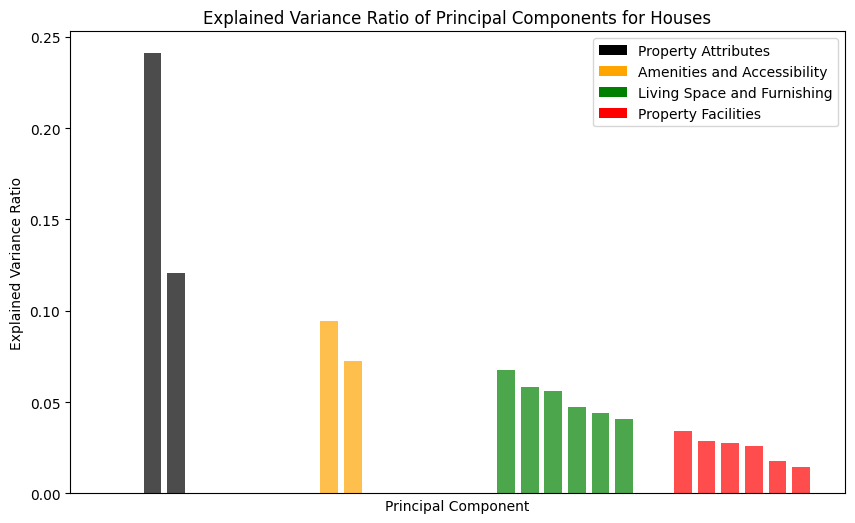

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assume df is your original DataFrame

# Drop rows with missing values
pcadf = df[df['Type of property'] == 'House']
pcadf = pcadf.dropna()

# Drop specified columns
columns_to_drop = ['Property ID', 'price_sqm', 'Price (euro)', 'Garden boolean', 'Parking boolean', 'Terrace boolean',
                   'Bathrooms total nb boolean', 'Bathrooms', 'Shower rooms', 'Outdoor parking spaces', 
                   'Covered parking spaces', 'Postal code','Energy class boolean','Elevator boolean','Energy class','New Construction boolean']
pcadf.drop(columns=columns_to_drop, inplace=True)

# Selecting numerical columns for PCA
numerical_columns = pcadf.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Handling non-numeric values and missing data
numeric_transformer = StandardScaler()

# One-hot encode categorical columns
categorical_columns = []  # No categorical columns now

# Preprocess and transform the data
scaled_data = numeric_transformer.fit_transform(pcadf[numerical_columns])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Fit OneHotEncoder and get feature names
encoder = OneHotEncoder()
encoder.fit(pcadf[categorical_columns])
encoded_column_names = encoder.get_feature_names_out(categorical_columns).tolist()

# Combine column names
column_names = numerical_columns + encoded_column_names

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Extracting column names and their explained variance
variance_explained = [(column_names[i], explained_variance_ratio[i] * 100) for i in range(len(column_names))]

# Change the number of groups
num_groups = 5  # Change the number of groups here

# Reset groupings dictionary
groupings = {}

# Determine the number of features per group
features_per_group = len(variance_explained) // num_groups

# Grouping the column names and their explained variance
for i, (column, variance) in enumerate(variance_explained):
    group_index = i // features_per_group
    group = f'Group {group_index + 1}'
    if group not in groupings:
        groupings[group] = []
    groupings[group].append((column, variance))

# Extract explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Sort the explained variance ratio in descending order
sorted_indices = np.argsort(explained_variance_ratio)[::-1]
explained_variance_ratio_sorted = [explained_variance_ratio[i] for i in sorted_indices]

grouped_indices = [[0,1],[2,3],[4,5,6,7,8,9],[10,11,12,13,14,15]]
# Customizable group names and colors
custom_group_labels = ['Property Attributes', 'Amenities and Accessibility', 'Living Space and Furnishing','Property Facilities']
custom_colors = ['black', 'orange', 'green','red']

plt.figure(figsize=(10, 6))

bar_width = 0.15  # Width of each bar
space_between_bars = 0.05  # Space between bars
space_between_groups = 1.5  # Space between groups

# Plot bars for each group
for i, indices in enumerate(grouped_indices):
    group_label = custom_group_labels[i] if i < len(custom_group_labels) else f'Group {i+1}'
    color = custom_colors[i % len(custom_colors)] if i < len(custom_colors) else 'blue'
    for j, idx in enumerate(indices):
        x_position = i * space_between_groups + j * (bar_width + space_between_bars)
        plt.bar(x_position, explained_variance_ratio[idx], width=bar_width, alpha=0.7, color=color)

# Print the grouped features and their explained variance
for group, columns in groupings.items():
    print(f"{group}:\n")
    for column, variance in columns:
        print(f"{column}: {variance:.2f}%")
    print("\n")

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components for Houses')

# Create legend for groups
group_labels = custom_group_labels[:num_groups]
for i, label in enumerate(group_labels):
    plt.bar(0, 0, color=custom_colors[i % len(custom_colors)], label=label)

plt.legend()

plt.xticks([])

plt.show()



Group 1:

Construction year: 14.22%
Building condition boolean: 9.21%
Double glazing boolean: 7.78%


Group 2:

Elevator boolean: 6.87%
Accessible for disabled people boolean: 6.39%
Living surface (sqm): 6.11%


Group 3:

Furnished boolean: 5.77%
Nb of Bedrooms: 5.76%
Bathrooms total nb: 5.51%


Group 4:

Kitchen equipped boolean: 5.41%
Open fire: 5.27%
Number of frontages: 4.92%


Group 5:

Swimming pool boolean: 4.72%
Plot surface (sqm): 3.80%
Terrace surface (sqm): 3.61%


Group 6:

Garden surface (sqm): 3.09%
Parking tot nb: 1.56%
Flood safe boolean: 0.00%


Group 7:

Tenement building boolean: 0.00%




C:\Users\MKnaepen\AppData\Local\Temp\ipykernel_25784\2499513046.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MKnaepen\AppData\Local\Temp\ipykernel_25784\2499513046.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



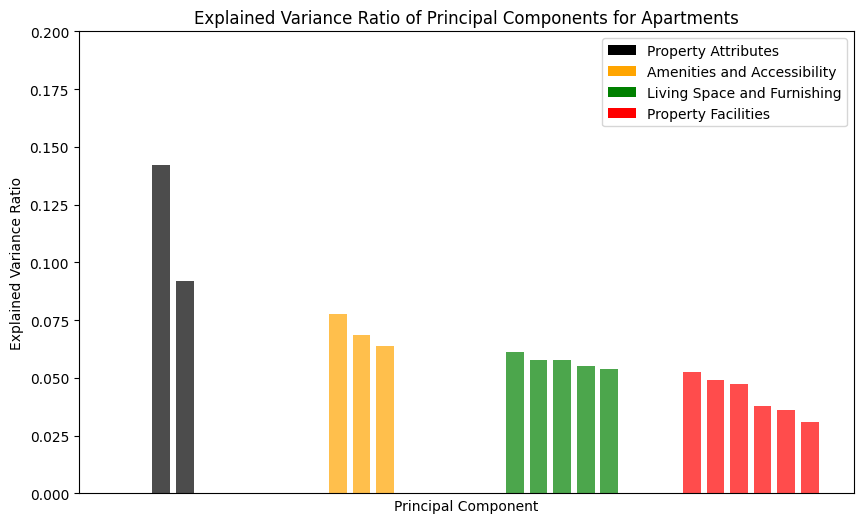

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assume df is your original DataFrame
#df = pd.read_csv('clean_data/data_set_CLEAN.csv')
# Drop rows with missing values
pcadf2 = df[df['Type of property'] == 'Apartment']

numeric_columns = pcadf2.select_dtypes(include=['number']).columns

# fill -1 to all NaN 
pcadf2[numeric_columns] = pcadf2[numeric_columns].fillna(0)

# Drop specified columns
columns_to_drop = ['Property ID', 'price_sqm', 'Price (euro)', 'Garden boolean', 'Parking boolean', 'Terrace boolean',
                   'Bathrooms total nb boolean', 'Bathrooms', 'Shower rooms', 'Outdoor parking spaces', 
                   'Covered parking spaces', 'Postal code','Energy class boolean','Energy class', 'New Construction boolean']
pcadf2.drop(columns=columns_to_drop, inplace=True)

pcadf2 = pcadf2.dropna()
# Selecting numerical columns for PCA
numerical_columns = pcadf2.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Fill missing values with mean for numerical columns
#pcadf2[numerical_columns] = pcadf2[numerical_columns].fillna(pcadf2[numerical_columns].mean())

# Handling non-numeric values and missing data
numeric_transformer = StandardScaler()
# One-hot encode categorical columns
categorical_columns = []  # No categorical columns now

# Preprocess and transform the data
scaled_data = numeric_transformer.fit_transform(pcadf2[numerical_columns])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Fit OneHotEncoder and get feature names
encoder = OneHotEncoder()
encoder.fit(pcadf2[categorical_columns])
encoded_column_names = encoder.get_feature_names_out(categorical_columns).tolist()

# Combine column names
column_names = numerical_columns + encoded_column_names

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Extracting column names and their explained variance
variance_explained = [(column_names[i], explained_variance_ratio[i] * 100) for i in range(len(column_names))]

# Change the number of groups
num_groups = 5  # Change the number of groups here

# Reset groupings dictionary
groupings = {}

# Determine the number of features per group
features_per_group = len(variance_explained) // num_groups

# Grouping the column names and their explained variance
for i, (column, variance) in enumerate(variance_explained):
    group_index = i // features_per_group
    group = f'Group {group_index + 1}'
    if group not in groupings:
        groupings[group] = []
    groupings[group].append((column, variance))

# Extract explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Sort the explained variance ratio in descending order
sorted_indices = np.argsort(explained_variance_ratio)[::-1]
explained_variance_ratio_sorted = [explained_variance_ratio[i] for i in sorted_indices]

grouped_indices = [[0,1],[2,3,4],[5,6,7,8,9],[10,11,12,13,14,15]]

# Customizable group names and colors
custom_group_labels = ['Property Attributes', 'Amenities and Accessibility', 'Living Space and Furnishing','Property Facilities']
custom_colors = ['black', 'orange', 'green','red']

plt.figure(figsize=(10, 6))

bar_width = 0.15  # Width of each bar
space_between_bars = 0.05  # Space between bars
space_between_groups = 1.5  # Space between groups

# Plot bars for each group
for i, indices in enumerate(grouped_indices):
    group_label = custom_group_labels[i] if i < len(custom_group_labels) else f'Group {i+1}'
    color = custom_colors[i % len(custom_colors)] if i < len(custom_colors) else 'blue'
    for j, idx in enumerate(indices):
        x_position = i * space_between_groups + j * (bar_width + space_between_bars)
        plt.bar(x_position, explained_variance_ratio[idx], width=bar_width, alpha=0.7, color=color)

# Print the grouped features and their explained variance
for group, columns in groupings.items():
    print(f"{group}:\n")
    for column, variance in columns:
        print(f"{column}: {variance:.2f}%")
    print("\n")

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components for Apartments')
plt.ylim(0,0.2)

# Create legend for groups
group_labels = custom_group_labels[:num_groups]
for i, label in enumerate(group_labels):
    plt.bar(0, 0, color=custom_colors[i % len(custom_colors)], label=label)

plt.legend()

# Hide x-axis labels
plt.xticks([])

plt.show()




In [ ]:
def province(dfval):
    postal_codes = [range(1000,1300), range(1300, 1500), range(1500,1990), range(3000,3500), range(2000,3000), range(3500,4000), range(4000,5000), range(5000,6000), range(6000,6600), range(7000,8000), range(6600,7000), range(8000,9000), range(9000,10000)]
    provinces = ['Brussels Hoofdstedelijk Gewest', 'Waals-Brabant', 'Vlaams-Brabant', 'Vlaams-Brabant', 'Antwerpen', 'Limburg', 'Luik', 'Namen','Henegouwen', 'Henegouwen','Luxemburg', 'West-Vlaanderen', 'Oost-Vlaanderen']
    
    for pc_range, prov in zip(postal_codes, provinces):
        if dfval in pc_range:
            return prov

df['province'] = df['Postal code'].apply(lambda x: province(x))


def region(dfval):
    if dfval in range(1300,1500) or dfval in range(4000,7000):
        return 'Wallonia'
    elif dfval in range(1000,1300):
        return 'Brussels'
    else:
        return 'Flanders'

df['region'] = df['Postal code'].apply(lambda x: region(x))

countrydf = df[['Locality','Postal code','Construction year', 'Price (euro)','Type of property', 'Subtype', 'Energy class', 'Heating type', 'Building condition','province','region','price_sqm']]
countrydf['price_sqm'] = round(countrydf['price_sqm'])
countrydf['Locality'] = countrydf['Locality'].str.capitalize()
display(countrydf.head())

C:\Users\MKnaepen\AppData\Local\Temp\ipykernel_25784\2810977237.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MKnaepen\AppData\Local\Temp\ipykernel_25784\2810977237.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Locality  Postal code  Construction year  Price (euro) Type of property  \
0     Ronse         9600              1,959        259000            House   
1  Zottegem         9620              1,976        645000            House   
2   Seraing         4100              1,900        329000            House   
3   Beersel         1653              1,979        379000            House   
4    Oupeye         4684              1,990        199000            House   

              Subtype Energy class Heating type Building condition  \
0               villa            E          Gas        To renovate   
1               villa            E     Fuel oil               Good   
2  mixed-use-building            E          Gas        To renovate   
3          town-house            F     Fuel oil               Good   
4            bungalow          NaN     Electric         To be done   

          province    region  price_sqm  
0  Oost-Vlaanderen  Flanders      1,570  
1  Oost-Vlaanderen  Flanders      2,371  
2             Luik  Wallonia      2,991  
3   Vlaams-Brabant  Flanders      2,369  
4             Luik  Wallonia      2,457

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

pricedf = df[['Locality', 'Postal code', 'Price (euro)', 'Type of property', 'price_sqm','province']]
housedf = pricedf[pricedf['Type of property'] == 'House']
housedf = housedf.sort_values('Price (euro)')
housedf = housedf.groupby('Postal code').agg({'Locality': 'first','province':'first', 'Price (euro)': 'mean', 'price_sqm': 'mean' })
# Find the 5 postal codes with the lowest prices
lowest_prices = housedf.nsmallest(5, 'Price (euro)').drop(columns='price_sqm')
lowestsqm = housedf.nsmallest(5, 'price_sqm').drop(columns='Price (euro)')

# Find the 5 postal codes with the highest prices
highest_prices = housedf.nlargest(5, 'Price (euro)').drop(columns='price_sqm')
highestsqm = housedf.nlargest(7, 'price_sqm').drop(columns='Price (euro)')

print("5 postal codes with the lowest prices for houses:")
display(lowest_prices, lowestsqm)

print("\n5 postal codes with the highest prices for houses:")
display(highest_prices, highestsqm)



5 postal codes with the lowest prices for houses:


Locality    province  Price (euro)
Postal code                                         
6440         froidchapelle  Henegouwen        75,000
6464                riezes  Henegouwen        79,667
5542              blaimont       Namen        84,000
4601                  vise        Luik        85,000
4834              limbourg        Luik        94,000

Locality         province  price_sqm
Postal code                                          
6824         chassepierre        Luxemburg        312
8583              bossuit  West-Vlaanderen        466
6741                vance        Luxemburg        478
8978                watou  West-Vlaanderen        651
5544              agimont            Namen        729


5 postal codes with the highest prices for houses:


Locality                        province  Price (euro)
Postal code                                                          
1404           nivelles                   Waals-Brabant     3,250,000
8300             knokke                 West-Vlaanderen     2,902,847
4731             raeren                            Luik     2,890,000
6688         longchamps                       Luxemburg     2,250,000
1190             forest  Brussels Hoofdstedelijk Gewest     2,031,240

Locality         province  price_sqm
Postal code                                           
4525         retranchement             Luik     13,770
8300                knokke  West-Vlaanderen      9,774
9676              winseler  Oost-Vlaanderen      7,750
1404              nivelles    Waals-Brabant      5,570
4731                raeren             Luik      5,446
8301         heist-aan-zee  West-Vlaanderen      4,903
9881                aalter  Oost-Vlaanderen      4,740

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

pricedf = df[['Locality', 'Postal code', 'Price (euro)', 'Type of property', 'price_sqm','province']]
appartmentdf = pricedf[pricedf['Type of property'] == 'Apartment']
appartmentdf = appartmentdf.sort_values('Price (euro)')
appartmentdf = appartmentdf.groupby('Postal code').agg({'Locality': 'first','province':'first', 'Price (euro)': 'mean', 'price_sqm': 'mean' })
# Find the 5 postal codes with the lowest prices
lowest_prices = appartmentdf.nsmallest(5, 'Price (euro)').drop(columns='price_sqm')
lowestsqm = appartmentdf.nsmallest(5, 'price_sqm').drop(columns='Price (euro)')

# Find the 5 postal codes with the highest prices
highest_prices = appartmentdf.nlargest(5, 'Price (euro)').drop(columns='price_sqm')
highestsqm = appartmentdf.nlargest(6, 'price_sqm').drop(columns='Price (euro)')

print("5 postal codes with the lowest prices for appartments:")
display(lowest_prices, lowestsqm)

print("\n5 postal codes with the highest prices for appartments:")
display(highest_prices, highestsqm)



5 postal codes with the lowest prices for appartments:


Locality    province  Price (euro)
Postal code                                                    
5550         vresse-sur-semois-membre       Namen        77,250
6987                          rendeux   Luxemburg       104,000
4820                            dison        Luik       105,667
6001             charleroi-marcinelle  Henegouwen       114,780
6870                        st-hubert   Luxemburg       115,000

Locality    province  price_sqm
Postal code                                                        
6887                              herbeumont   Luxemburg        605
7780                        comines-warneton  Henegouwen        780
4821                               andrimont        Luik        876
6120         ham-sur-heure-nalinnes-jamioulx  Henegouwen        928
6750                                  musson   Luxemburg        982


5 postal codes with the highest prices for appartments:


Locality         province  Price (euro)
Postal code                                                    
8300                knocke-heist  West-Vlaanderen     1,230,666
1933         zaventem-sterrebeek   Vlaams-Brabant     1,225,444
2110                    wijnegem        Antwerpen     1,061,472
9830          sint-martens-latem  Oost-Vlaanderen       987,750
8301                knocke-heyst  West-Vlaanderen       789,211

Locality         province  price_sqm
Postal code                                                
8300               knocke-heist  West-Vlaanderen     11,815
8301               knocke-heyst  West-Vlaanderen      8,438
3000                     leuven   Vlaams-Brabant      7,260
9830         sint-martens-latem  Oost-Vlaanderen      7,060
3502                   benidorm          Limburg      6,506
3080                   tervuren   Vlaams-Brabant      6,373

In [ ]:
display(countrydf.head())
countrydf2 = countrydf[['Locality','Price (euro)']]

Locality  Postal code  Construction year  Price (euro) Type of property  \
0     Ronse         9600              1,959        259000            House   
1  Zottegem         9620              1,976        645000            House   
2   Seraing         4100              1,900        329000            House   
3   Beersel         1653              1,979        379000            House   
4    Oupeye         4684              1,990        199000            House   

              Subtype Energy class Heating type Building condition  \
0               villa            E          Gas        To renovate   
1               villa            E     Fuel oil               Good   
2  mixed-use-building            E          Gas        To renovate   
3          town-house            F     Fuel oil               Good   
4            bungalow          NaN     Electric         To be done   

          province    region  price_sqm  
0  Oost-Vlaanderen  Flanders      1,570  
1  Oost-Vlaanderen  Flanders      2,371  
2             Luik  Wallonia      2,991  
3   Vlaams-Brabant  Flanders      2,369  
4             Luik  Wallonia      2,457

In [ ]:
g

In [ ]:
import plotly.express as px
import pandas as pd

# Load your dataset containing postal codes and values
# Example data format: DataFrame with columns 'PostalCode' and 'Value'
data = countrydf

# Create a Plotly choropleth map
fig = px.choropleth(data, 
                    geojson=geojson,        # GeoJSON file
                    locations='Locality', # Column containing postal codes
                    color='Price (euro)',          # Column containing values to visualize
                    color_continuous_scale="Viridis",  # Color scale
                    range_color=(0, max(data['Price (euro)'])), # Range of values
                    labels={'Value': 'Your Label'}, # Label for color bar
                    title='Choropleth Map of Belgium Postal Codes',  # Title of the map
                    scope= 'europe')
# Show the map
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (9, 4)
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titleweight'] = 'bold'


In [ ]:
# Basic DF information
df = pd.read_csv('data_set_CLEAN.csv')


nan_count = df.isna().sum().sum()
total_values = df.size
nan_percentage = round((nan_count / total_values) * 100,1)
print (f'the number of row and column is {df.shape}')

print (f'total nb of values in the data set is {total_values}')
print (f'the % of Nan in the whole dataset is {nan_percentage}')
print ('\n')
print('General information on the DF :')
print(df.info())
print(df.dtypes.value_counts())






the number of row and column is (24794, 49)
total nb of values in the data set is 1214906
the % of Nan in the whole dataset is 25.4


General information on the DF :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24794 entries, 0 to 24793
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Locality                                24794 non-null  object 
 1   province                                24794 non-null  object 
 2   region                                  24794 non-null  object 
 3   Postal code                             24794 non-null  int64  
 4   Type of property                        24794 non-null  object 
 5   Subtype                                 24794 non-null  object 
 6   Price (euro)                            24794 non-null  int64  
 7   Construction year                       17787 non-null  float64
 8   New Construction boolean      

<Axes: >

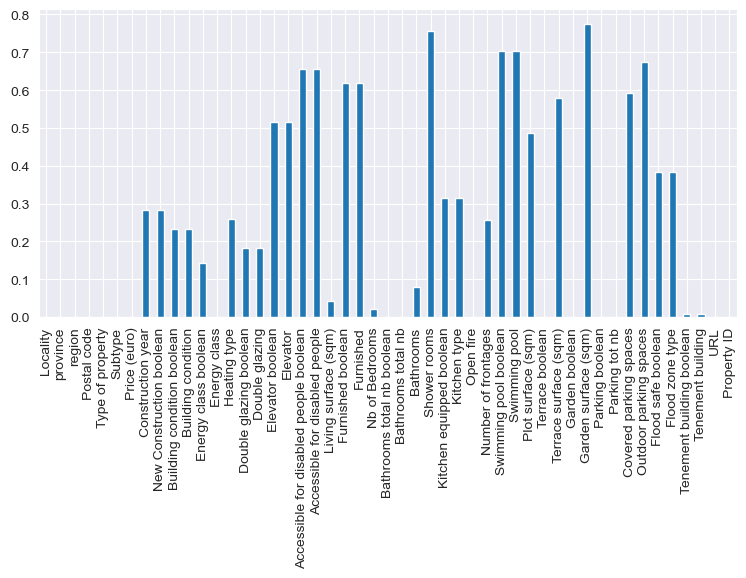

In [ ]:
# NaN representation
df.isna().mean().plot(kind='bar')

In [ ]:
#get geo loc impact on 
pd.options.display.float_format = '{:,.0f}'.format
print('Mean is:')
mean= round(df['Price (euro)'].mean(),0)
print(mean)
print('Median  is:')
median=round(df['Price (euro)'].median(),0)
print(median)
print('\n')

print('Mean by region is:')
mean_region = df.groupby('region')['Price (euro)'].mean().round(0).sort_values(ascending=False)
print(mean_region)
print('\n')
median_region = (df.groupby('region')['Price (euro)'].median().round(0).sort_values(ascending=False))
print('Median by region is:')
print(median_region)

print('\n')
print('Mean by province is:')
print(df.groupby('province')['Price (euro)'].mean().round(0).sort_values(ascending=False))
print('\n')
print('Median by province is:')
print(df.groupby('province')['Price (euro)'].median().round(0).sort_values(ascending=False))

Mean is:
474856.0
Median  is:
340000.0


Mean by region is:
region
Brussels   618,477
Flanders   481,080
Wallonia   357,419
Name: Price (euro), dtype: float64


Median by region is:
region
Brussels   400,000
Flanders   349,000
Wallonia   277,850
Name: Price (euro), dtype: float64


Mean by province is:
province
West-Vlaanderen                  625,627
Brussels Hoofdstedelijk Gewest   618,477
Waals-Brabant                    568,029
Vlaams-Brabant                   500,149
Antwerpen                        448,966
Oost-Vlaanderen                  419,631
Limburg                          389,095
Luxemburg                        335,001
Namen                            311,161
Luik                             293,227
Henegouwen                       264,064
Name: Price (euro), dtype: float64


Median by province is:
province
Waals-Brabant                    425,000
Vlaams-Brabant                   415,000
Brussels Hoofdstedelijk Gewest   400,000
West-Vlaanderen                  359,000
Oos

c:\Users\SL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(474856.0, 6, 'mean')

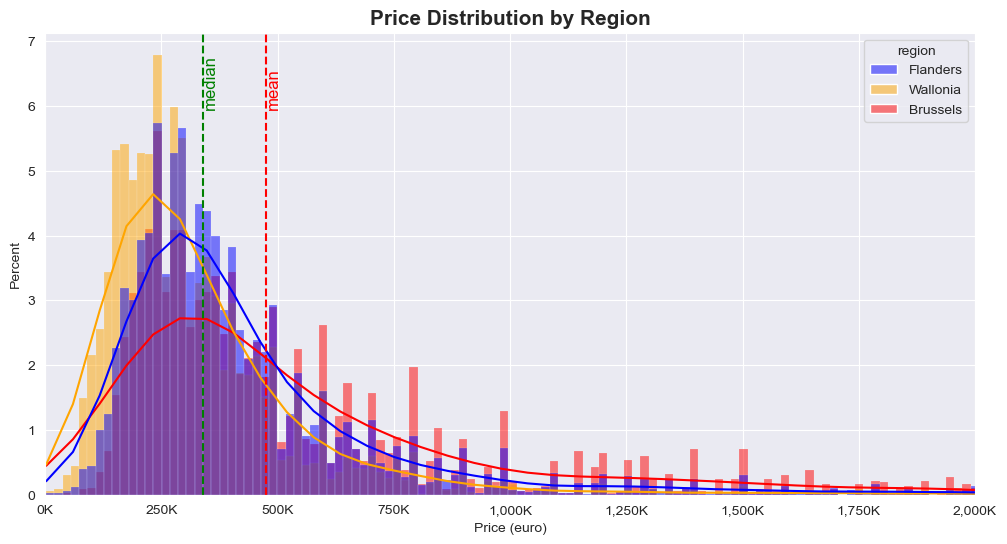

In [ ]:
#get a visual rep of the regional price diff 

pd.options.display.float_format = '{:,.0f}'.format
df = pd.read_csv('data_set_CLEAN.csv')

custom_palette = {'Flanders': 'blue', 'Wallonia': 'orange', 'Brussels': 'red'}

plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='Price (euro)', kde=True, hue='region',common_norm=False, stat = 'percent', palette=custom_palette)
# multiple='stack'  if stack preferred 

# put the x axis in keur instead of meur
def format_func(value, tick_number):
    return f'{value/1000:,.0f}K'
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_func))

# axes rework
plt.xlim(0, 2000000)
plt.xlabel("Price (euro)")
plt.ylabel("Percent")
plt.title("Price Distribution by Region")

# get the country median an mean 
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:,.0f} euro')
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:,.0f} euro')
plt.text(median,6,'median',color='green', rotation=90,fontsize = 12 )
plt.text(mean,6,'mean',color='red', rotation=90, fontsize = 12)




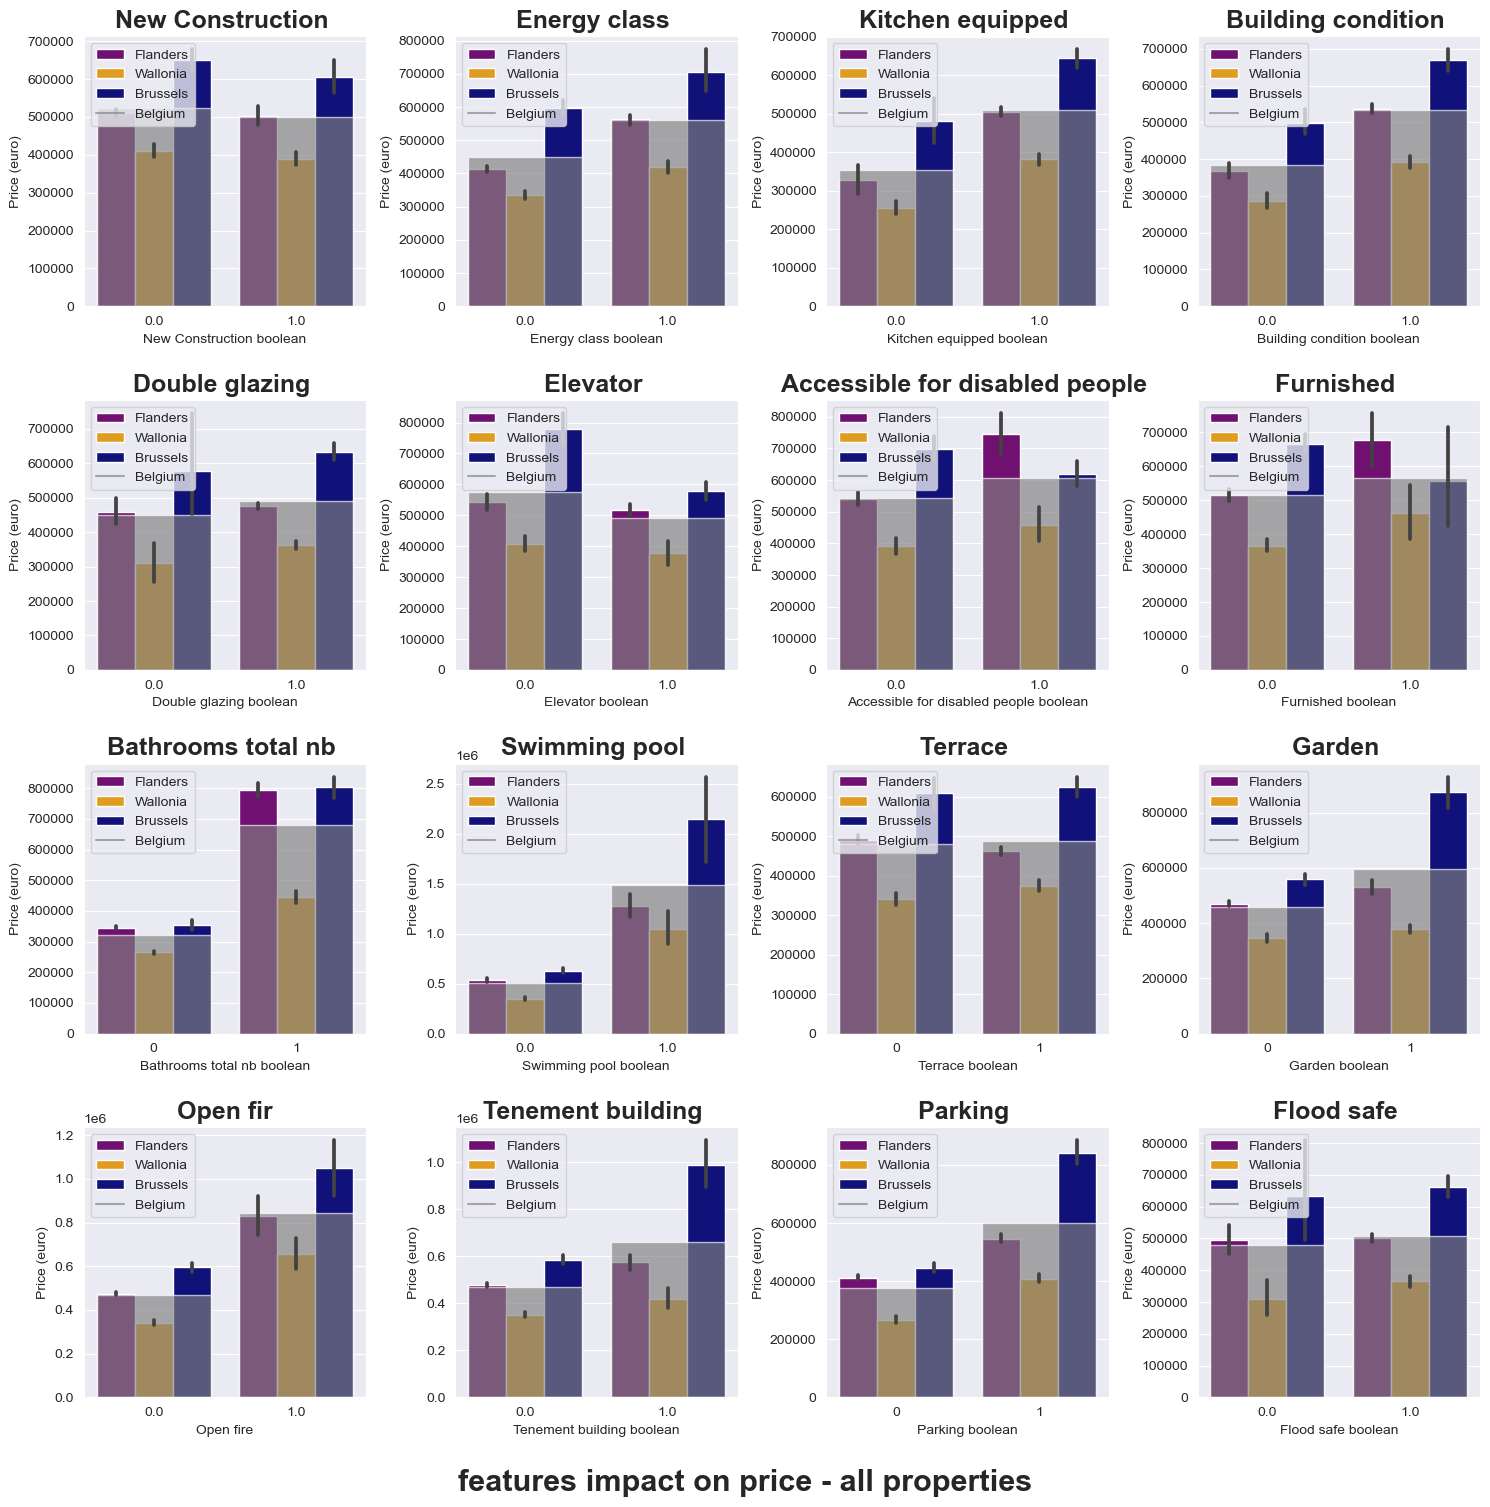

In [ ]:
# all properties, all features, impact on price

# Create the figure and axes
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
custom_palette = {'Flanders': 'purple', 'Wallonia': 'orange', 'Brussels': 'darkblue'}

# Flatten the axes array for easy iteration
axes = axes.flatten()

global_means = []
variables = ['New Construction boolean','Energy class boolean', 'Kitchen equipped boolean', 'Building condition boolean', 'Double glazing boolean', 'Elevator boolean', 'Accessible for disabled people boolean', 'Furnished boolean', 'Bathrooms total nb boolean', 'Swimming pool boolean', 'Terrace boolean', 'Garden boolean', 'Open fire', 'Tenement building boolean', 'Parking boolean', 'Flood safe boolean']


# Iterate over each variable and barplot for each subplot
for i, variable in enumerate(variables):
    if i < len(variables):  # Ensure you don't exceed the number of variables
        sns.barplot(x=variable, y='Price (euro)', data=df, hue="region", ax=axes[i], palette=custom_palette)
        axes[i].set_title (f'{variable.rstrip("boolean")}', fontsize=18)


        # Calculate the mean price for each boolean status across all provinces
        boolean_price_means = df.groupby([variable, 'region'])['Price (euro)'].mean().reset_index()
        total_price_means = boolean_price_means.groupby(variable)['Price (euro)'].mean()

        # Plot total mean bars
        for idx, (status, mean_price) in enumerate(total_price_means.items()):
            axes[i].bar(idx, mean_price, color='gray', alpha=0.66)  # Gray bars for total mean
            global_means.append(mean_price)  # Add the mean price to the global means list

        # Add a dummy plot for the global mean to get its handle and label
        global_mean_handle, = axes[i].plot([], [], color='gray', alpha=0.66)

        # Get handles and labels from the subplot legend
        handles, labels = axes[i].get_legend_handles_labels()

        # Add the handle and label for the global mean to the legend
        handles.append(global_mean_handle)
        labels.append('Belgium')

        # Add the legend each subplot
        axes[i].legend(handles, labels, loc='upper left')

#print title
figtext_kwargs = {'x': 0.5, 'y': -0.03 , 'ha': 'center', 'va': 'bottom', 'fontsize': 22, 'fontweight':'bold'}
fig.suptitle('features impact on price - all properties', **figtext_kwargs)


# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()


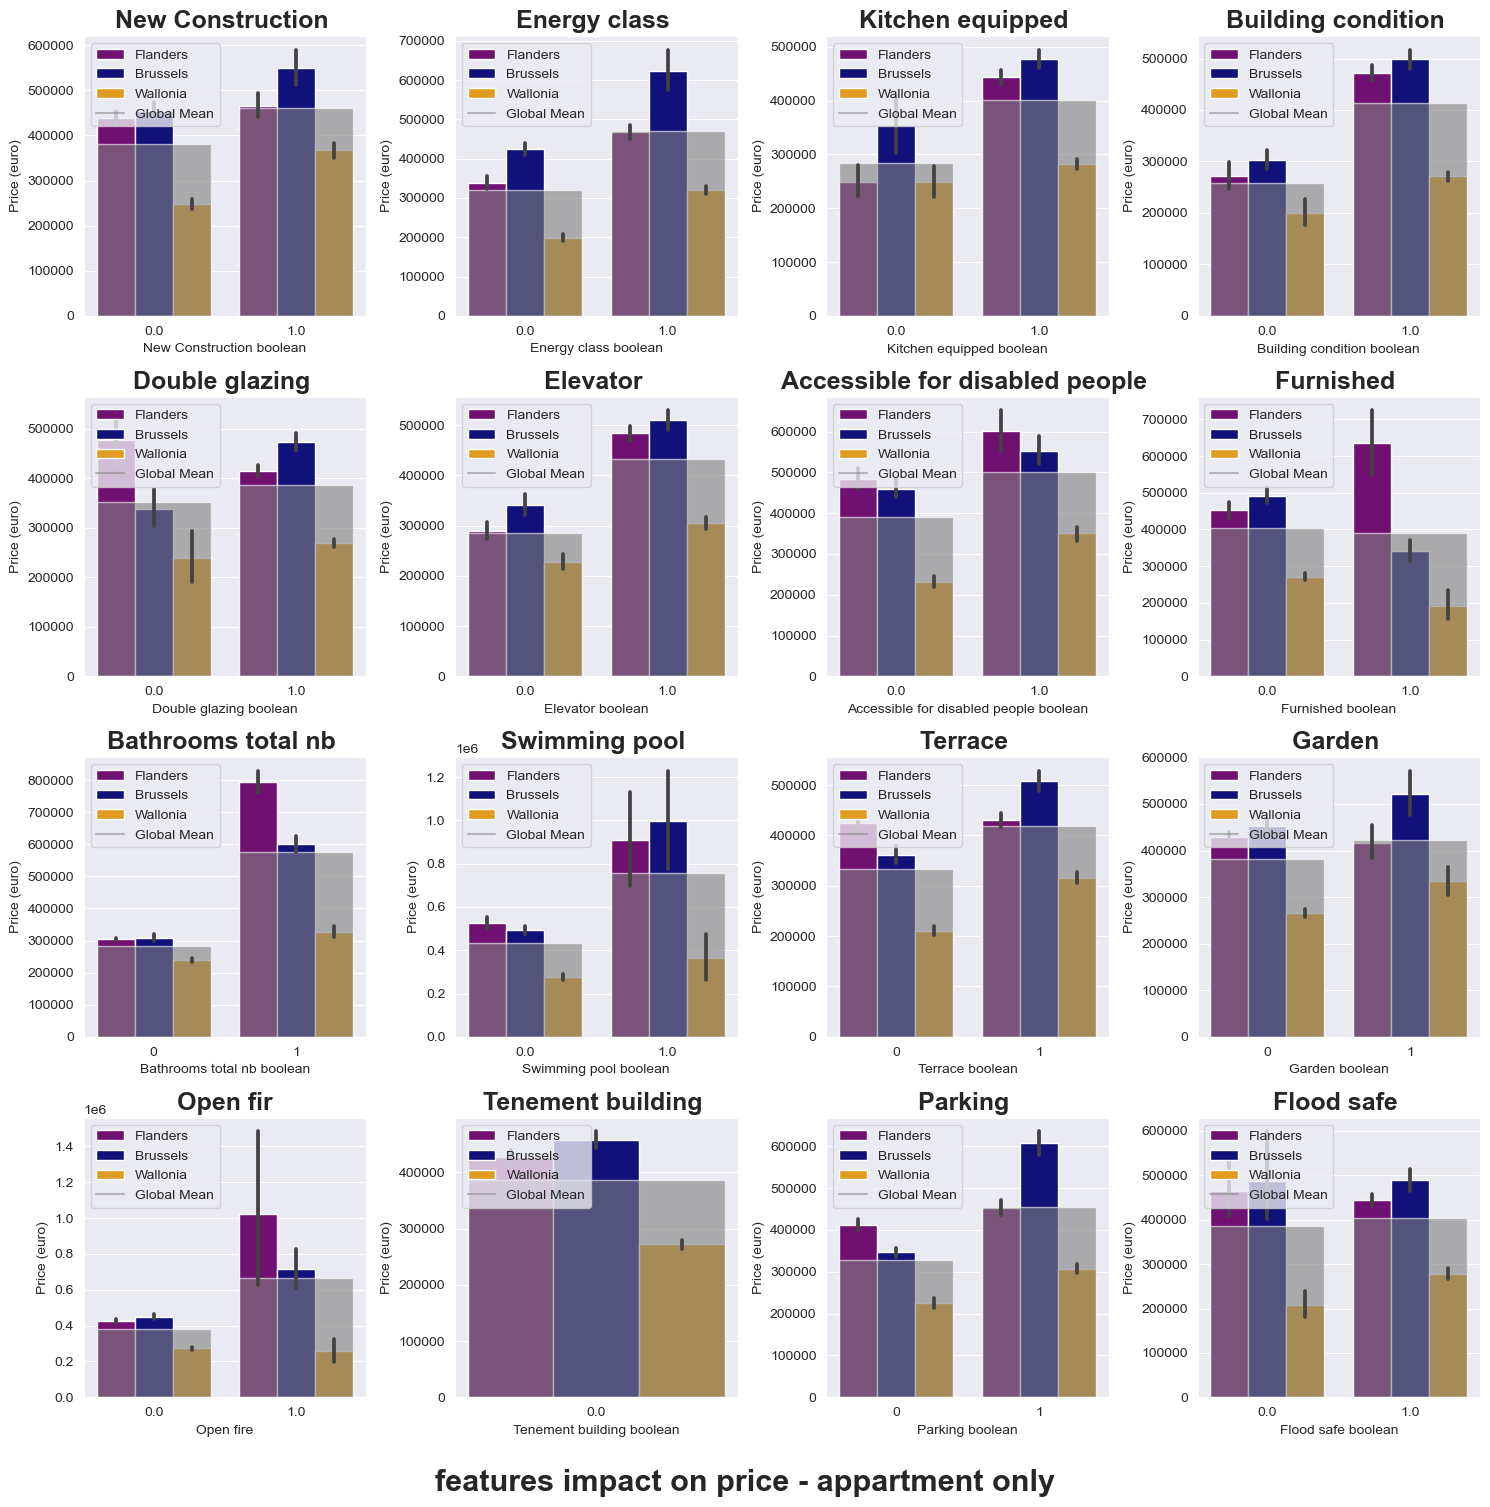

In [ ]:
# All Feature impact on aptmt property

apartment_df = df[df['Type of property'] == 'Apartment']

fig, axes = plt.subplots(4,4 , figsize=(15, 15))
custom_palette = {'Flanders': 'purple', 'Wallonia': 'orange', 'Brussels': 'darkblue'}

# Flatten to an np array to allow iteration
axes = axes.flatten()

variables = ['New Construction boolean','Energy class boolean', 'Kitchen equipped boolean', 'Building condition boolean', 'Double glazing boolean', 'Elevator boolean', 'Accessible for disabled people boolean', 'Furnished boolean', 'Bathrooms total nb boolean', 'Swimming pool boolean', 'Terrace boolean', 'Garden boolean', 'Open fire', 'Tenement building boolean', 'Parking boolean', 'Flood safe boolean']

# Iterate over each variable 
for i, variable in enumerate(variables):
    if i < len(variables):  # Ensure you don't exceed the number of variables
        sns.barplot(x=variable, y='Price (euro)', data=apartment_df, hue="region", ax=axes[i], palette = custom_palette)
        axes[i].set_title (f'{variable.rstrip("boolean")}', fontsize=18)


        # Calculate the mean price for each boolean status across all provinces
        boolean_price_means = apartment_df.groupby([variable, 'region'])['Price (euro)'].mean().reset_index()
        total_price_means = boolean_price_means.groupby(variable)['Price (euro)'].mean()

        # Plot total mean bars
        for idx, (status, mean_price) in enumerate(total_price_means.items()):
            axes[i].bar(idx, mean_price, color='grey', alpha=0.6)  # Gray bars for total mean
            global_means.append(mean_price)  # Add the mean price to the global means list

        # Add a dummy plot for the global mean to get its handle and label
        global_mean_handle, = axes[i].plot([], [], color='gray', alpha=0.5)

        # Get handles and labels from the subplot legend
        handles, labels = axes[i].get_legend_handles_labels()

        # Add the handle and label for the global mean to the legend
        handles.append(global_mean_handle)
        labels.append('Global Mean')

        # Add the legend to the subplot
        axes[i].legend(handles, labels, loc='upper left')


#print title
figtext_kwargs = {'x': 0.5, 'y': -0.03 , 'ha': 'center', 'va': 'bottom', 'fontsize': 22, 'fontweight':'bold'}
fig.suptitle('features impact on price - appartment only', **figtext_kwargs)

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()


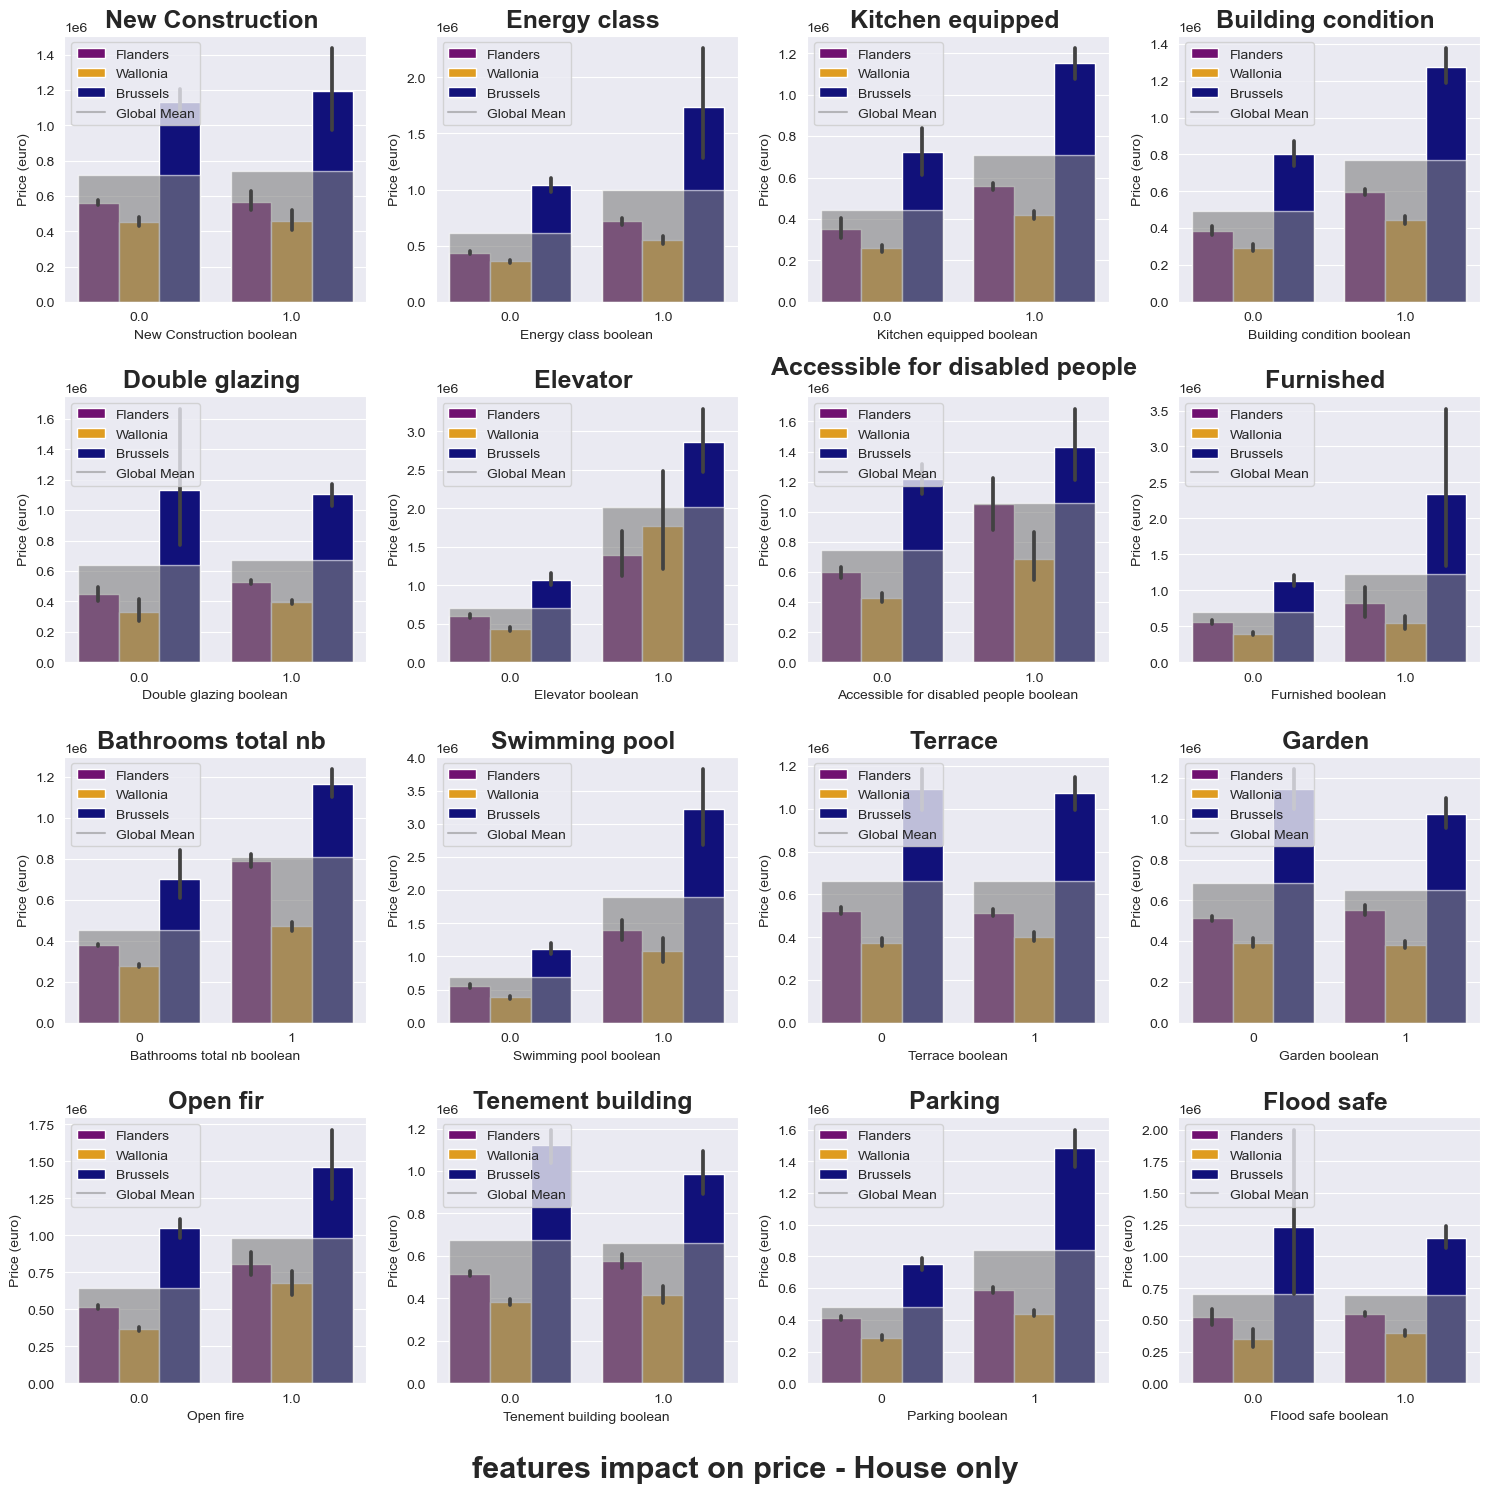

In [ ]:
# All Feature impact on houses property

apartment_df = df[df['Type of property'] == 'House']

fig, axes = plt.subplots(4,4 , figsize=(15, 15))
custom_palette = {'Flanders': 'purple', 'Wallonia': 'orange', 'Brussels': 'darkblue'}

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the variables for each subplot
variables = ['New Construction boolean','Energy class boolean', 'Kitchen equipped boolean', 'Building condition boolean', 'Double glazing boolean', 'Elevator boolean', 'Accessible for disabled people boolean', 'Furnished boolean', 'Bathrooms total nb boolean', 'Swimming pool boolean', 'Terrace boolean', 'Garden boolean', 'Open fire', 'Tenement building boolean', 'Parking boolean', 'Flood safe boolean']

# Iterate over each variable 
for i, variable in enumerate(variables):
    if i < len(variables):  # Ensure you don't exceed the number of variables
        sns.barplot(x=variable, y='Price (euro)', data=apartment_df, hue="region", ax=axes[i], palette = custom_palette)
        axes[i].set_title (f'{variable.rstrip("boolean")}', fontsize=18)


        # Calculate the mean price for each boolean status across all provinces
        boolean_price_means = apartment_df.groupby([variable, 'region'])['Price (euro)'].mean().reset_index()
        total_price_means = boolean_price_means.groupby(variable)['Price (euro)'].mean()

        # Plot total mean bars
        for idx, (status, mean_price) in enumerate(total_price_means.items()):
            axes[i].bar(idx, mean_price, color='grey', alpha=0.6)  # Gray bars for total mean
            global_means.append(mean_price)  # Add the mean price to the global means list

        # Add a dummy plot for the global mean to get its handle and label
        global_mean_handle, = axes[i].plot([], [], color='gray', alpha=0.5)

        # Get handles and labels from the subplot legend
        handles, labels = axes[i].get_legend_handles_labels()

        # Add the handle and label for the global mean to the legend
        handles.append(global_mean_handle)
        labels.append('Global Mean')

        # Add the legend to the subplot
        axes[i].legend(handles, labels, loc='upper left')


#print title
figtext_kwargs = {'x': 0.5, 'y': -0.03 , 'ha': 'center', 'va': 'bottom', 'fontsize': 22, 'fontweight':'bold'}
fig.suptitle('features impact on price - House only', **figtext_kwargs)

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()


c:\Users\SL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price Distribution by Segment')

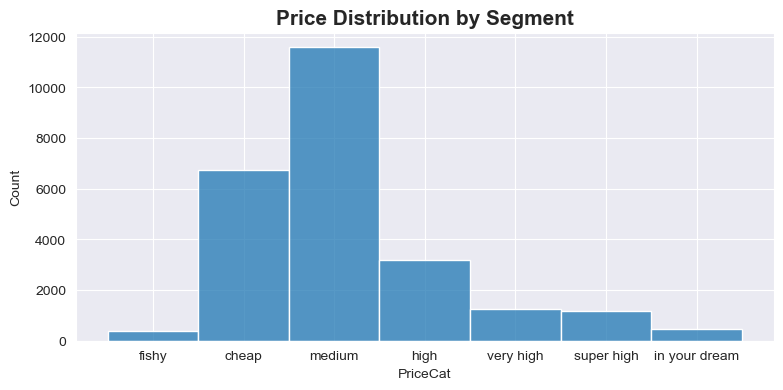

In [ ]:
# Price distribution by segment of price
PriceCat = pd.cut(df['Price (euro)'], bins=[0, 100000, 250000, 500000, 750000, 1000000, 2000000, 15000000], labels=['fishy', 'cheap', 'medium', 'high', 'very high', 'super high', 'in your dream'])
df['PriceCat'] = PriceCat
sns.histplot(df['PriceCat'])

#print title
plt.title('Price Distribution by Segment')

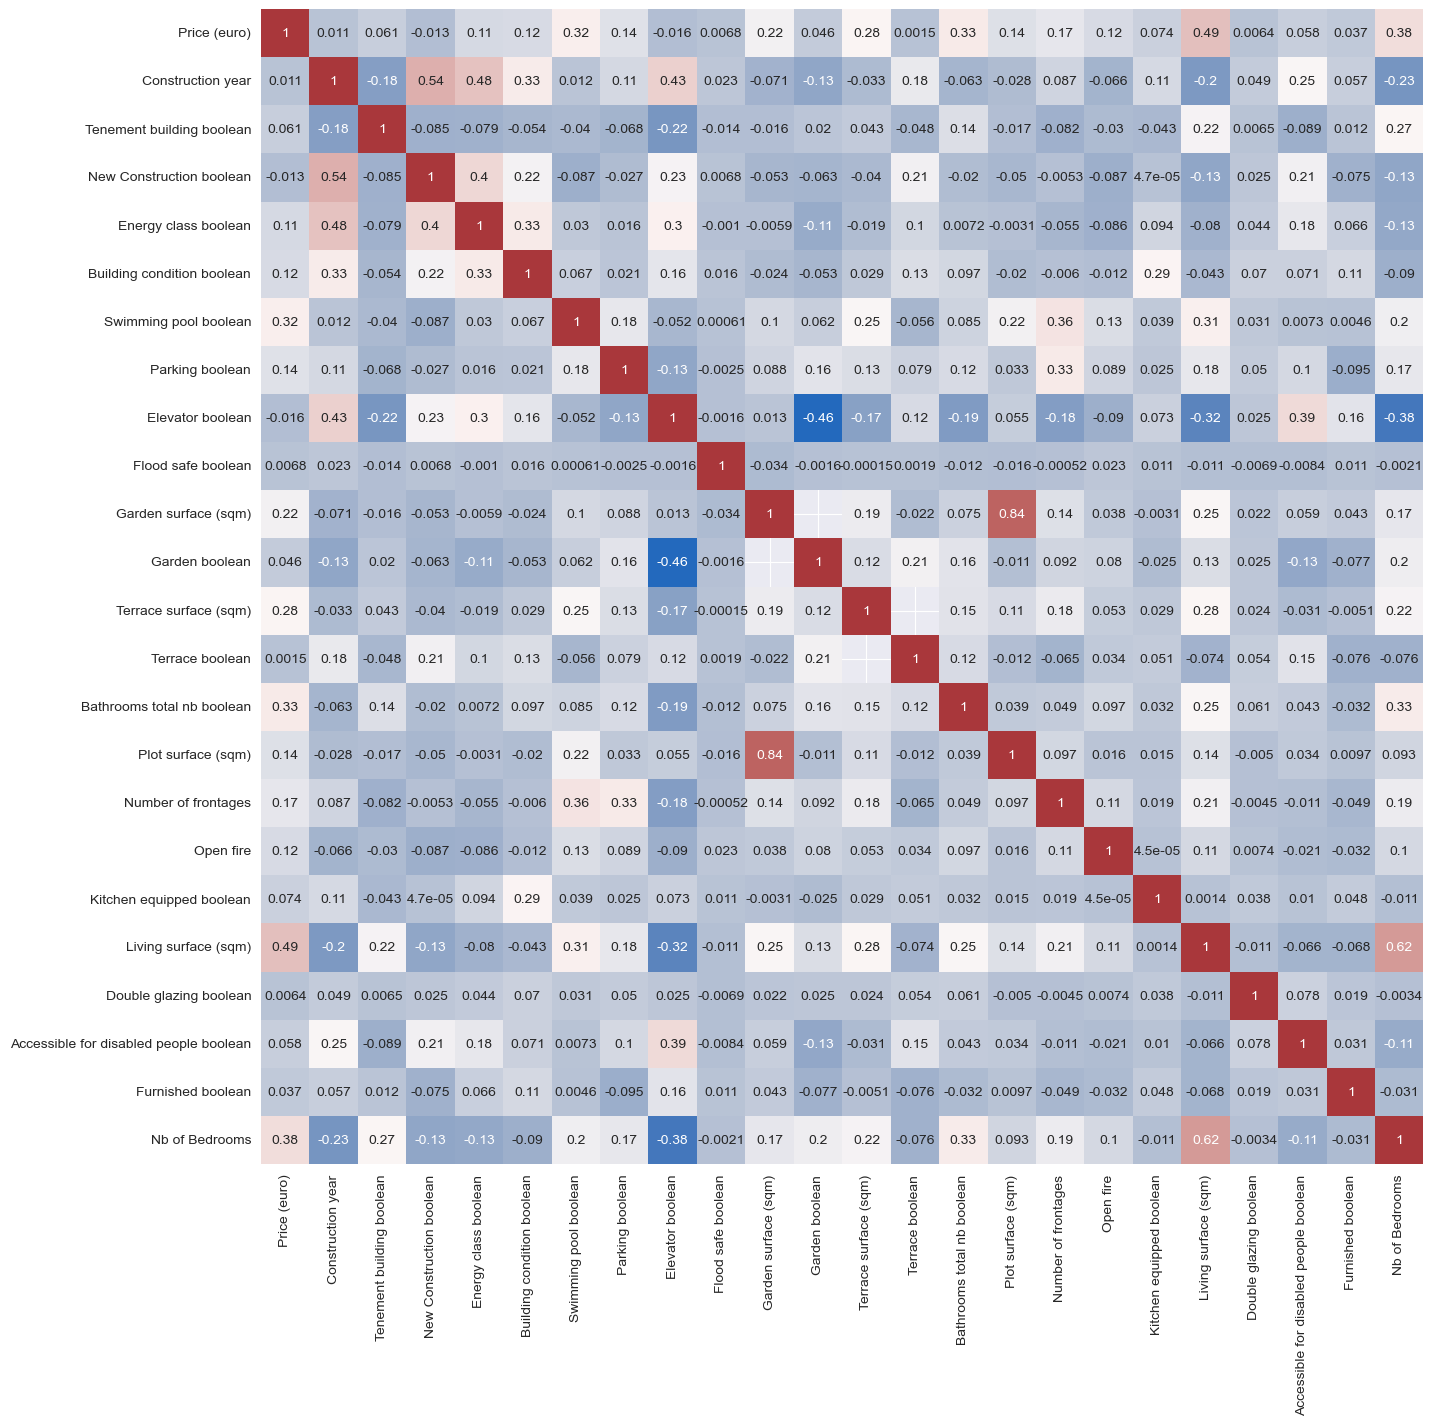

In [ ]:
# Correlation matrix on quanti features

qty_var = df[['Price (euro)', 'Construction year', 'Tenement building boolean','New Construction boolean','Energy class boolean' ,'Building condition boolean', 'Swimming pool boolean', 'Parking boolean', 'Elevator boolean', 'Flood safe boolean' ,'Garden surface (sqm)', 'Garden boolean','Terrace surface (sqm)','Terrace boolean','Bathrooms total nb boolean', 'Plot surface (sqm)','Number of frontages', 'Open fire', 'Kitchen equipped boolean' ,'Living surface (sqm)','Double glazing boolean','Accessible for disabled people boolean','Furnished boolean', 'Nb of Bedrooms' ]]
#float_col = data.select_dtypes('float').columns

plt.figure(figsize=(15, 15))
sns.heatmap(qty_var.corr(), annot=True, cbar=False, cmap='vlag')
plt.show()


<Axes: xlabel='Energy class', ylabel='Price (euro)'>

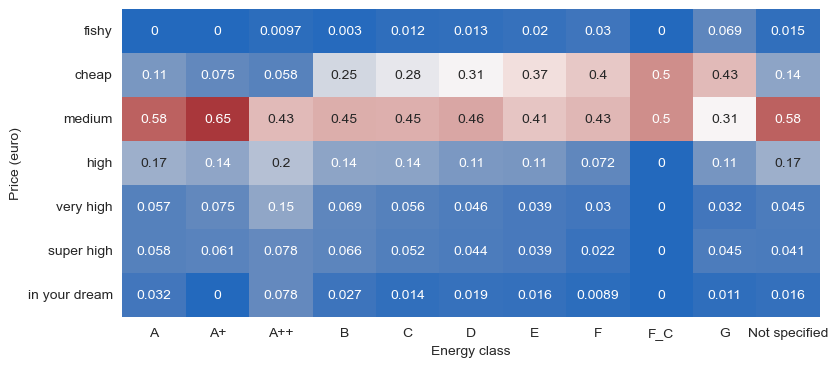

In [ ]:
# ross tab for qual parameters 
cross = pd.crosstab(PriceCat, df['Energy class'], normalize ='columns')
sns.heatmap(cross, annot=True, cbar = False, cmap = 'vlag')

In [ ]:
# map drawing attempt not working because the SHP file do not have the postal code to merge on. New approach taken with Maarteen using simple sns scatter plot + external postcode to coordinate source in the merge
import geopandas as gpd
import numpy as np

# Load the shapefile of Belgium's postal code boundaries
belgium_postal_codes = gpd.read_file('georef-belgium-postal-codes.shp')
print(type(belgium_postal_codes))
print(belgium_postal_codes)
print(belgium_postal_codes.columns)
average_price_per_postal_code = df.groupby('Postal code')['Price (euro)'].mean()
belgium_postal_codes.to_csv('bpd.csv', index=False)    

#belgium_postal_codes = belgium_postal_codes.merge(average_price_per_postal_code, on='geometry')

""" Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
belgium_postal_codes.plot(column='Price (euro)', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Average Price per Postal Code in Belgium')
plt.show()"""

<class 'geopandas.geodataframe.GeoDataFrame'>
                                               geometry
0     POLYGON ((4.98786 50.13467, 4.98492 50.13449, ...
1     POLYGON ((4.82442 50.53793, 4.82531 50.53600, ...
2     POLYGON ((4.82346 50.17948, 4.82350 50.18117, ...
3     POLYGON ((5.30093 51.10579, 5.30611 51.10279, ...
4     POLYGON ((5.18388 51.07702, 5.18755 51.07817, ...
...                                                 ...
1226  POLYGON ((4.36834 50.91557, 4.36817 50.91493, ...
1227  POLYGON ((4.48987 50.90178, 4.49222 50.89702, ...
1228  POLYGON ((4.66325 50.79316, 4.65992 50.79324, ...
1229  POLYGON ((4.15739 50.86320, 4.15847 50.86533, ...
1230  POLYGON ((4.95744 50.90121, 4.95682 50.90048, ...

[1231 rows x 1 columns]
Index(['geometry'], dtype='object')


" Plot the heatmap\nfig, ax = plt.subplots(figsize=(10, 10))\nbelgium_postal_codes.plot(column='Price (euro)', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)\nplt.title('Average Price per Postal Code in Belgium')\nplt.show()"

Axes(0.125,0.11;0.775x0.77)


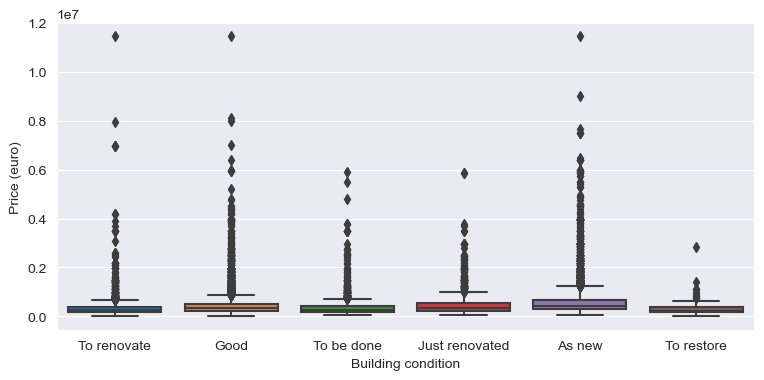

In [ ]:
# examples of outliers cross price
print(sns.boxplot(data=df, y='Price (euro)', x='Building condition'))


Axes(0.125,0.11;0.775x0.77)


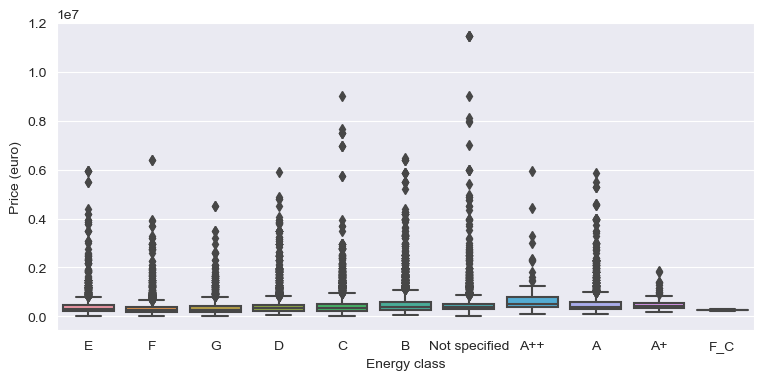

In [ ]:
# examples of outliers cross price
print(sns.boxplot(data=df, y='Price (euro)', x='Energy class'))




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [ ]:
df = pd.read_csv("data_set_CLEAN.csv")
df.head()

Locality         province    region  Postal code Type of property  \
0     ronse  Oost-Vlaanderen  Flanders         9600            House   
1  zottegem  Oost-Vlaanderen  Flanders         9620            House   
2   seraing             Luik  Wallonia         4100            House   
3   beersel   Vlaams-Brabant  Flanders         1653            House   
4    oupeye             Luik  Wallonia         4684            House   

              Subtype  Price (euro)  Construction year  \
0               villa        259000             1959.0   
1               villa        645000             1976.0   
2  mixed-use-building        329000             1900.0   
3          town-house        379000             1979.0   
4            bungalow        199000             1990.0   

   New Construction boolean  Building condition boolean  ... Parking boolean  \
0                       0.0                         0.0  ...               1   
1                       0.0                         1.0  ...               1   
2                       0.0                         0.0  ...               1   
3                       0.0                         1.0  ...               1   
4                       0.0                         0.0  ...               1   

   Parking tot nb Covered parking spaces Outdoor parking spaces  \
0               6                    1.0                    5.0   
1               6                    2.0                    4.0   
2               7                    1.0                    6.0   
3               2                    1.0                    1.0   
4               2                    1.0                    1.0   

   Flood safe boolean Flood zone type  Tenement building boolean  \
0                 1.0  Non flood zone                        0.0   
1                 1.0  Non flood zone                        0.0   
2                 1.0  Non flood zone                        1.0   
3                 1.0  Non flood zone                        0.0   
4                 1.0  Non flood zone                        0.0   

  Tenement building                                                URL  \
0                No  https://www.immoweb.be/en/classified/villa/for...   
1                No  https://www.immoweb.be/en/classified/villa/for...   
2               Yes  https://www.immoweb.be/en/classified/mixed-use...   
3                No  https://www.immoweb.be/en/classified/town-hous...   
4                No  https://www.immoweb.be/en/classified/bungalow/...   

  Property ID  
0    11135548  
1    11135545  
2    11135101  
3    11135086  
4    11134158  

[5 rows x 49 columns]

In [ ]:
df.columns


Index(['Locality', 'province', 'region', 'Postal code', 'Type of property',
       'Subtype', 'Price (euro)', 'Construction year',
       'New Construction boolean', 'Building condition boolean',
       'Building condition', 'Energy class boolean', 'Energy class',
       'Heating type', 'Double glazing boolean', 'Double glazing',
       'Elevator boolean', 'Elevator',
       'Accessible for disabled people boolean',
       'Accessible for disabled people', 'Living surface (sqm)',
       'Furnished boolean', 'Furnished', 'Nb of Bedrooms',
       'Bathrooms total nb boolean', 'Bathrooms total nb', 'Bathrooms',
       'Shower rooms', 'Kitchen equipped boolean', 'Kitchen type', 'Open fire',
       'Number of frontages', 'Swimming pool boolean', 'Swimming pool',
       'Plot surface (sqm)', 'Terrace boolean', 'Terrace surface (sqm)',
       'Garden boolean', 'Garden surface (sqm)', 'Parking boolean',
       'Parking tot nb', 'Covered parking spaces', 'Outdoor parking spaces',
       'Flood 

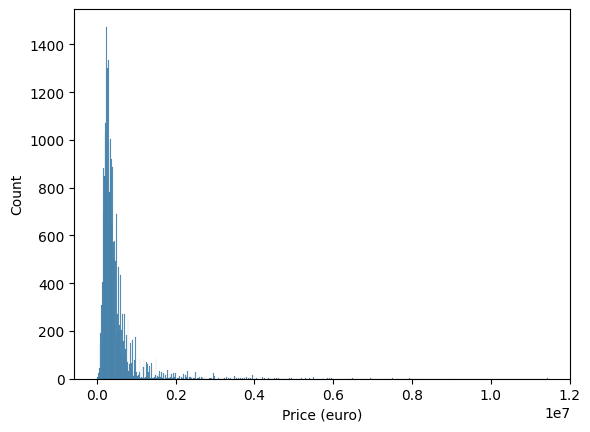

In [ ]:
p = df['Price (euro)']
sns.histplot(p)
plt.show()

In [ ]:
c = df.groupby(['Locality','Subtype'])
c.first()

province    region  \
Locality                Subtype                                         
#NOM?                   villa                     Antwerpen  Flanders   
aalbeke                 apartment           West-Vlaanderen  Flanders   
                        house               West-Vlaanderen  Flanders   
aalst                   apartment           Oost-Vlaanderen  Flanders   
                        apartment-block     Oost-Vlaanderen  Flanders   
...                                                     ...       ...   
zwijndrecht             villa                     Antwerpen  Flanders   
zwijndrecht-burcht      duplex                    Antwerpen  Flanders   
                        mixed-use-building        Antwerpen  Flanders   
zwijndrecht-zwijndrecht apartment                 Antwerpen  Flanders   
                        house                     Antwerpen  Flanders   

                                            Postal code Type of property  \
Locality                Subtype                                            
#NOM?                   villa                      2970            House   
aalbeke                 apartment                  8511        Apartment   
                        house                      8511            House   
aalst                   apartment                  9300        Apartment   
                        apartment-block            9300            House   
...                                                 ...              ...   
zwijndrecht             villa                      2070            House   
zwijndrecht-burcht      duplex                     2070        Apartment   
                        mixed-use-building         2070            House   
zwijndrecht-zwijndrecht apartment                  2070        Apartment   
                        house                      2070            House   

                                            Price (euro)  Construction year  \
Locality                Subtype                                               
#NOM?                   villa                    2995000             1998.0   
aalbeke                 apartment                 239000             1993.0   
                        house                     315000             1956.0   
aalst                   apartment                 239000             1966.0   
                        apartment-block           365000             1971.0   
...                                                  ...                ...   
zwijndrecht             villa                     698000             1960.0   
zwijndrecht-burcht      duplex                    575000             1912.0   
                        mixed-use-building        335000             1920.0   
zwijndrecht-zwijndrecht apartment                 265000             2007.0   
                        house                     299000             1970.0   

                                            New Construction boolean  \
Locality                Subtype                                        
#NOM?                   villa                                    0.0   
aalbeke                 apartment                                0.0   
                        house                                    0.0   
aalst                   apartment                                0.0   
                        apartment-block                          0.0   
...                                                              ...   
zwijndrecht             villa                                    0.0   
zwijndrecht-burcht      duplex                                   0.0   
                        mixed-use-building                       0.0   
zwijndrecht-zwijndrecht apartment                                0.0   
                        house                                    0.0   

                                            Building condition boolean  \
Locality                Subtype                                          

c:\Users\mahak\Web Scraping\my-fancy-projects\.myvirtualenviornment\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


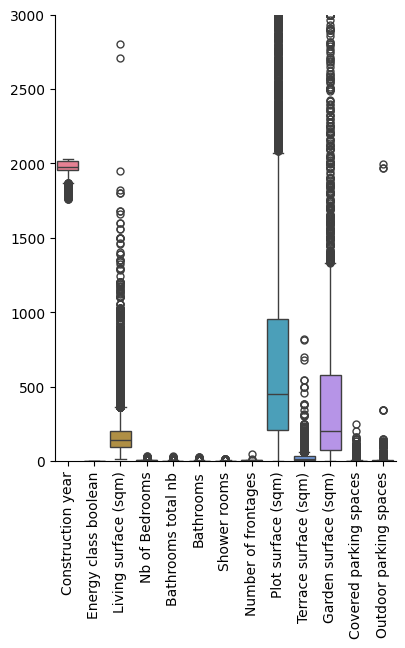

In [ ]:
df_outliners = pd.read_csv("data_set_CLEAN.csv")
col_drop = ['Locality', 'province', 'region', 'Postal code', 'Type of property','Subtype','New Construction boolean', 'Building condition boolean',
       'Building condition', 'Energy class','Heating type', 'Double glazing boolean', 'Double glazing','Elevator boolean', 'Elevator',
       'Accessible for disabled people boolean','Accessible for disabled people','Furnished boolean', 'Furnished','Bathrooms total nb boolean','Kitchen equipped boolean', 'Kitchen type', 'Open fire',
       'Swimming pool boolean', 'Swimming pool','Terrace boolean', 'Garden boolean', 'Parking boolean','Parking tot nb','Flood safe boolean', 'Flood zone type', 'Tenement building boolean',
       'Tenement building', 'URL', 'Property ID','Price (euro)','Energy class boolean']
df_outliners.drop(columns=col_drop, inplace=True)
g=sns.catplot(data=df_outliners,kind="box")
plt.ylim(0,3000)
plt.xticks(rotation=90)
plt.show()

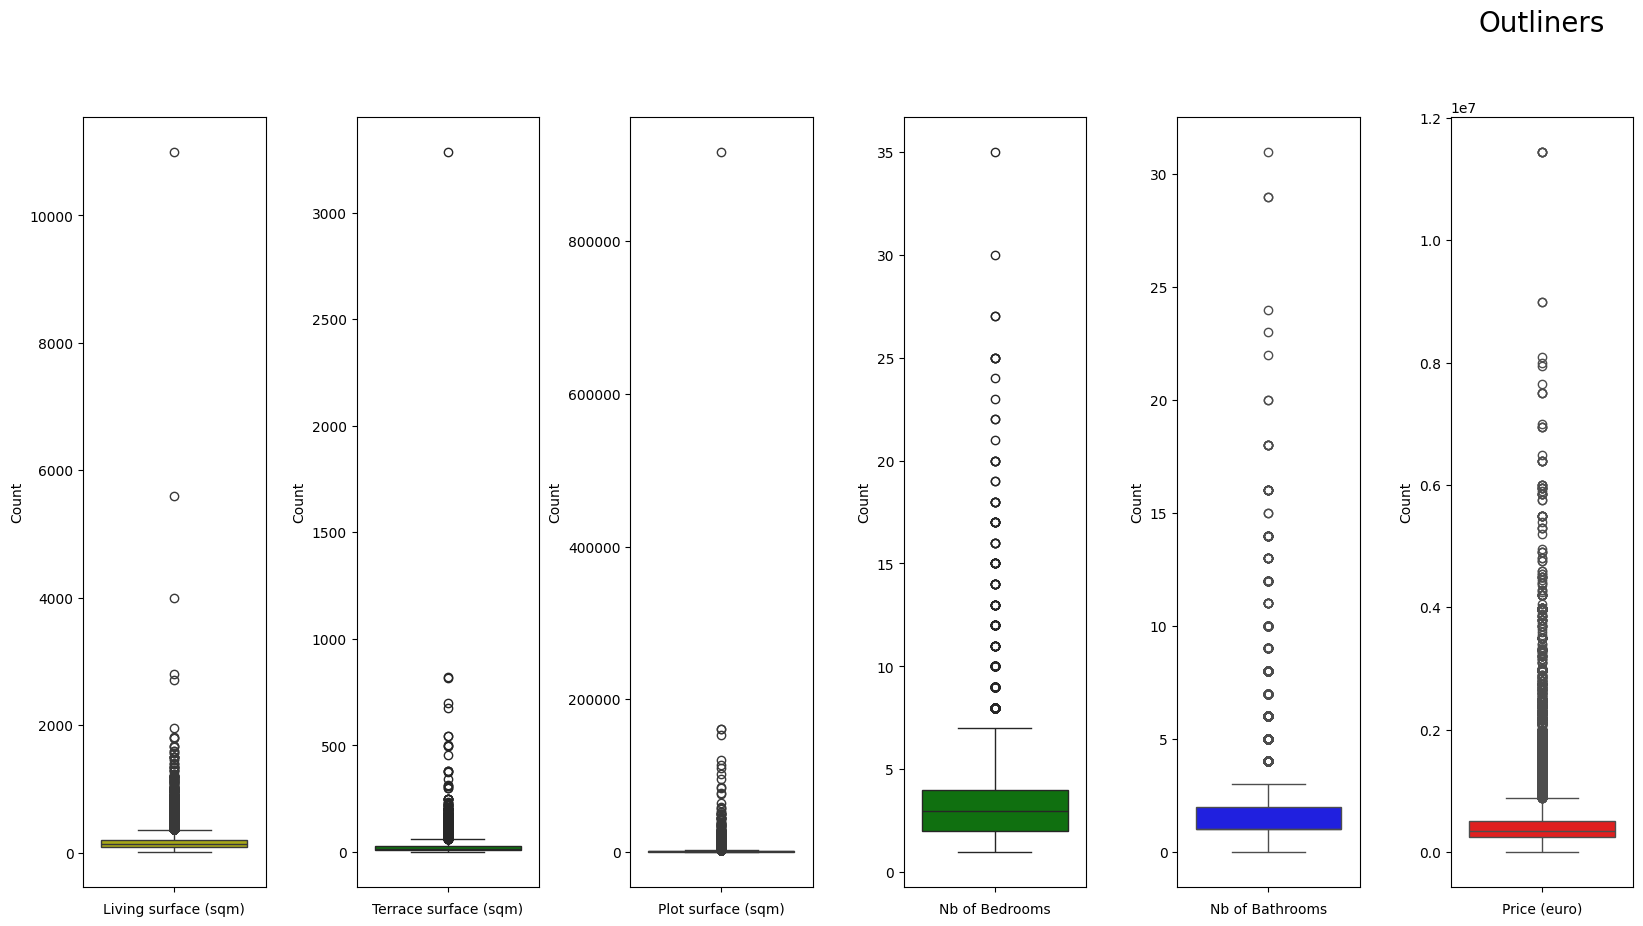

In [ ]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 6, figsize=(20, 10))
 
# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 
 
# draw boxplot for age in the 1st subplot
sns.boxplot(data=df['Living surface (sqm)'], ax=ax[0], color='y',)
ax[0].set_xlabel('Living surface (sqm)')
ax[0].set_ylabel('Count')
 
# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=df['Terrace surface (sqm)'], ax=ax[1], color='g')
ax[1].set_xlabel('Terrace surface (sqm)')
ax[1].set_ylabel('Count')

# draw boxplot for age in the 1st subplot
sns.boxplot(data=df['Plot surface (sqm)'], ax=ax[2], color='y',)
ax[2].set_xlabel('Plot surface (sqm)')
ax[2].set_ylabel('Count')
 
# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=df['Nb of Bedrooms'], ax=ax[3], color='g')
ax[3].set_xlabel('Nb of Bedrooms')
ax[3].set_ylabel('Count')

# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=df['Bathrooms total nb'], ax=ax[4], color='b')
ax[4].set_xlabel('Nb of Bathrooms')
ax[4].set_ylabel('Count')
 
# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=df['Price (euro)'], ax=ax[5], color='r')
ax[5].set_xlabel('Price (euro)')
ax[5].set_ylabel('Count')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])

plt.title("Outliners",fontsize=20,y=1.1)
plt.xticks(rotation=90)    
plt.show()

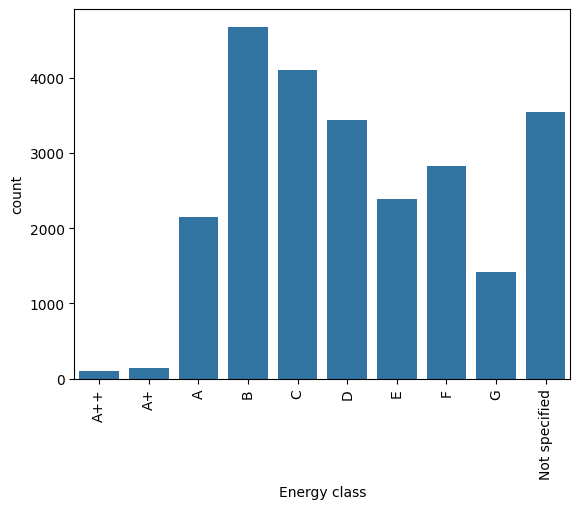

In [ ]:
# Energy Class
ordered_energy_class = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']
sns.countplot(x="Energy class", data=df, order=ordered_energy_class)
plt.xticks(rotation=90)
plt.show()

c:\Users\mahak\Web Scraping\my-fancy-projects\.myvirtualenviornment\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


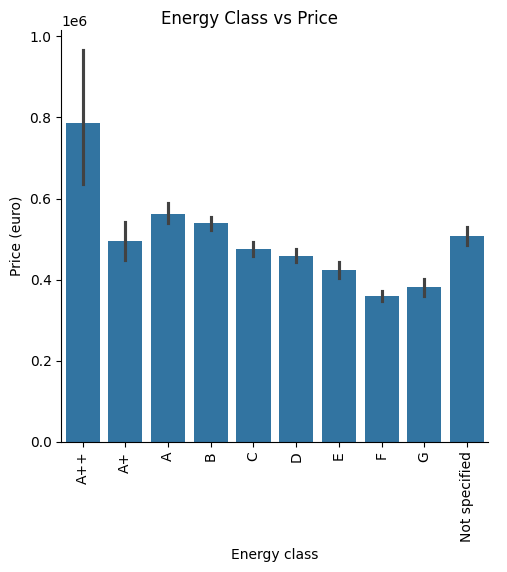

In [ ]:
# Corelation between Energy Class and Price
g = sns.catplot(kind="bar",x="Energy class", y="Price (euro)", data=df, order=ordered_energy_class)
g.fig.suptitle("Energy Class vs Price")
plt.xticks(rotation=90)
plt.show()

c:\Users\mahak\Web Scraping\my-fancy-projects\.myvirtualenviornment\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


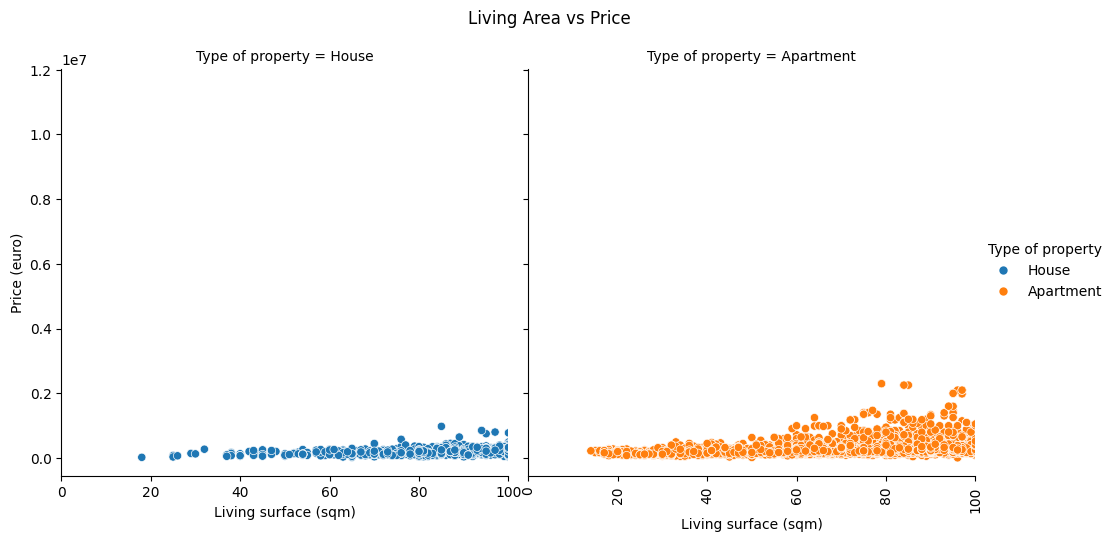

In [ ]:
# Corelation between Living Area and Price
g = sns.relplot(kind="scatter",x="Living surface (sqm)", y="Price (euro)", data=df, hue="Type of property" , col ="Type of property")
g.fig.suptitle("Living Area vs Price" , y=1.05)
plt.xticks(rotation=90)
plt.xlim(0,100)
plt.show()

c:\Users\mahak\Web Scraping\my-fancy-projects\.myvirtualenviornment\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


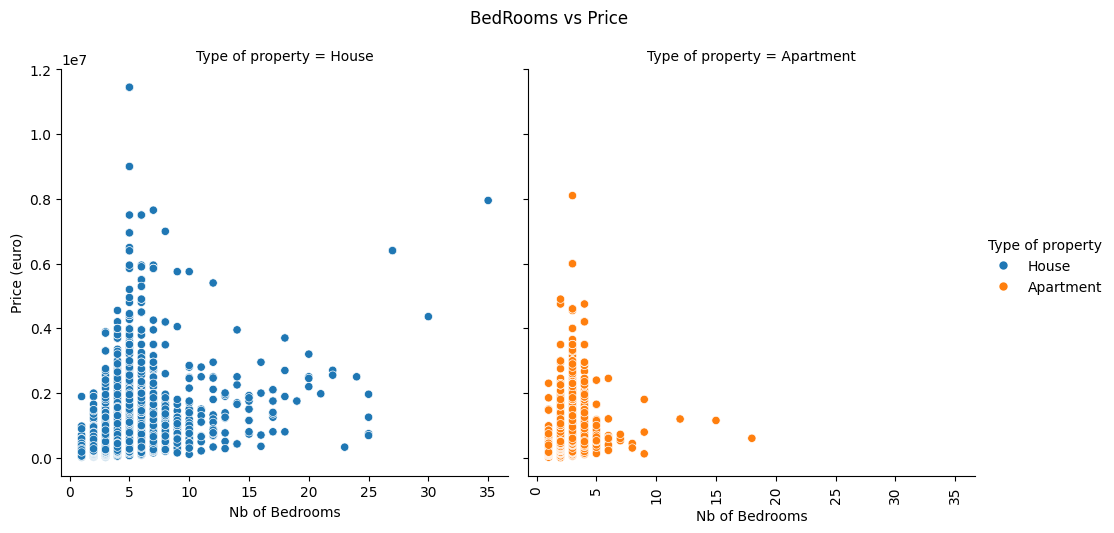

In [ ]:
# Corelation between Number of Bedrooms and Price
g = sns.relplot(kind="scatter",x="Nb of Bedrooms", y="Price (euro)", data=df, hue="Type of property" , col ="Type of property")
g.fig.suptitle("BedRooms vs Price" , y=1.05)
plt.xticks(rotation=90)
plt.show()

c:\Users\mahak\Web Scraping\my-fancy-projects\.myvirtualenviornment\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


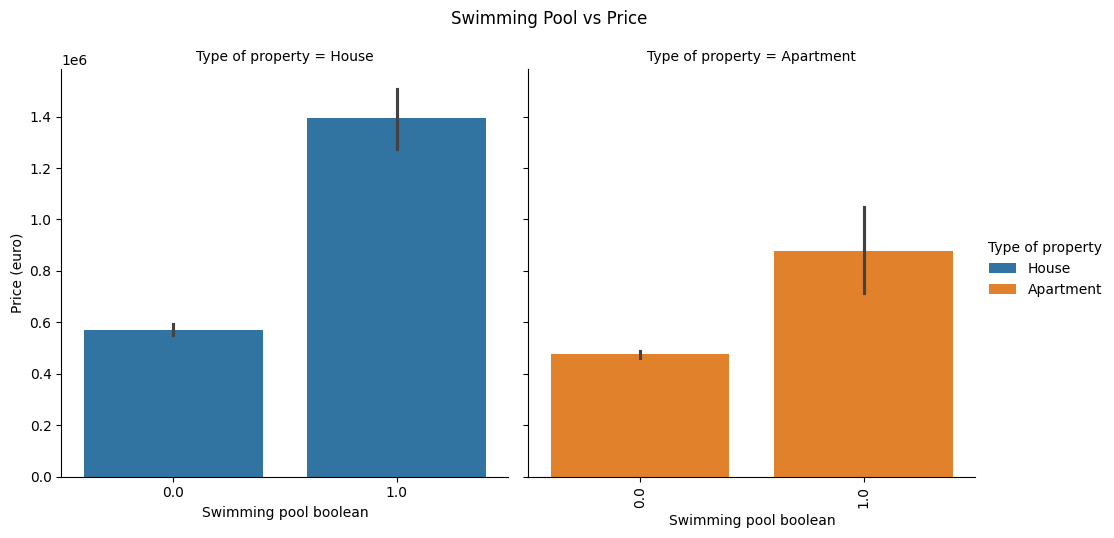

In [ ]:
# Corelation between Swimming Pool and Price
g = sns.catplot(kind="bar",x="Swimming pool boolean", y="Price (euro)", data=df, hue="Type of property" , col ="Type of property")
g.fig.suptitle("Swimming Pool vs Price" , y=1.05)
plt.xticks(rotation=90)
plt.show()

c:\Users\mahak\Web Scraping\my-fancy-projects\.myvirtualenviornment\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


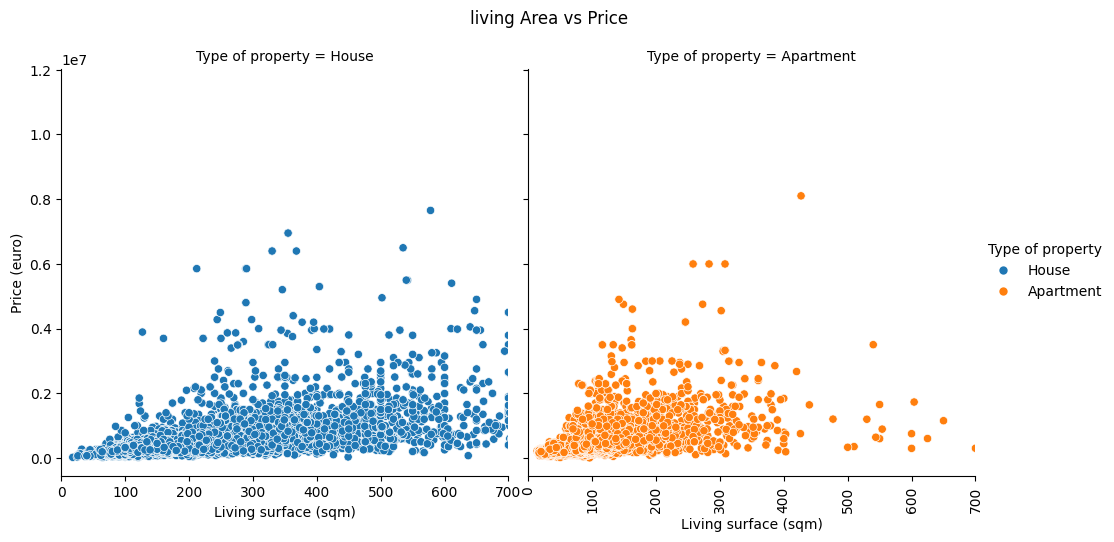

In [ ]:
# Corelation between Living Area and Price
g = sns.relplot(kind="scatter",x="Living surface (sqm)", y="Price (euro)", data=df, hue="Type of property" , col ="Type of property")
g.fig.suptitle("living Area vs Price" , y=1.05)
plt.xlim(0,700)
plt.xticks(rotation=90)
plt.show()

c:\Users\mahak\Web Scraping\my-fancy-projects\.myvirtualenviornment\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

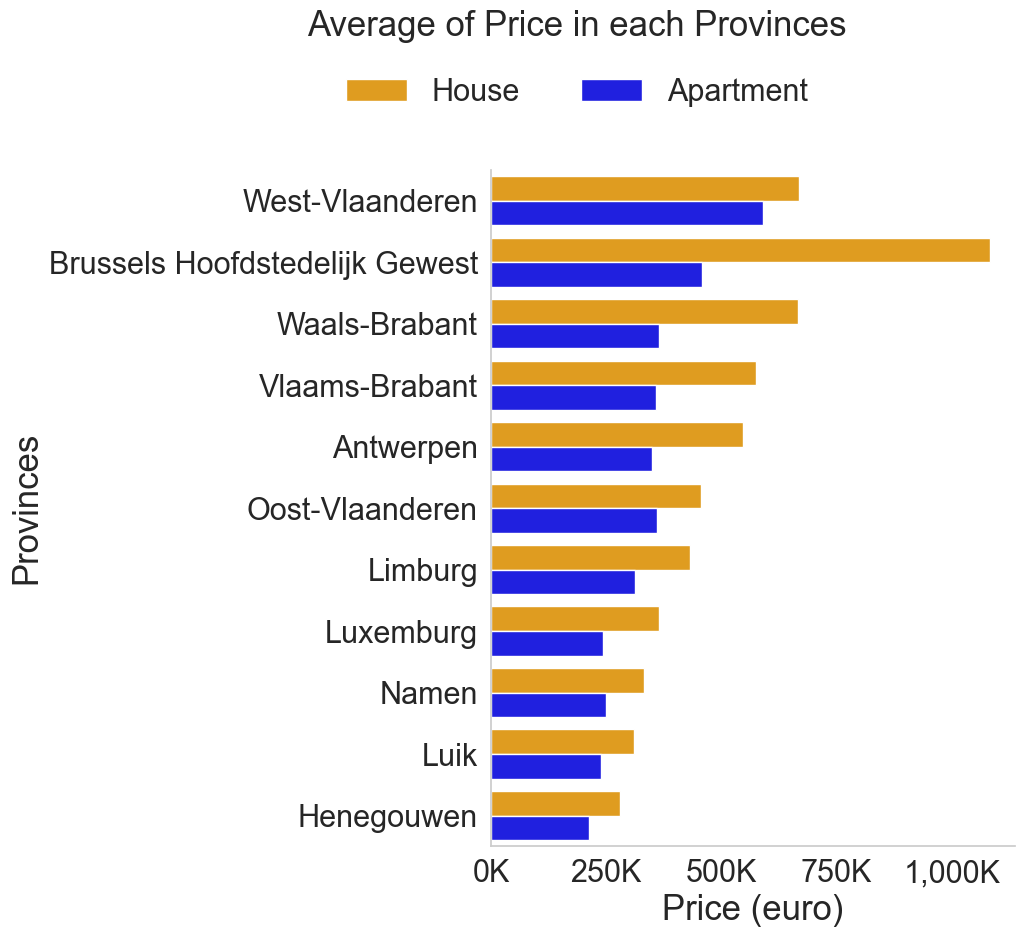

In [ ]:

#Average of Price in each Provinces
plt.figure(figsize=(12, 6))
sns.set(font_scale=2.0)
sns.set_style("whitegrid", {'axes.grid' : False})
color_palette= {"Apartment" : "blue" , "House" : "orange"}
agg_price = df.groupby(['province'])['Price (euro)'].mean().reset_index().sort_values('Price (euro)', ascending=False)
g = sns.catplot(kind='bar',y='province', x='Price (euro)', data=df,order=agg_price['province'],errorbar=None , hue="Type of property" , palette = color_palette, height=8.27, aspect=11.7/8.27)
g.set(ylabel='Provinces', xlabel='Price (euro)')
g.fig.suptitle("Average of Price in each Provinces",fontsize=25,y=1.15)
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
# put the x axis in keur instead of meur
def format_func(value, tick_number):
    return f'{value/1000:,.0f}K'
g.ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_func))

plt.xlabel("Price (euro)", fontsize=25)
plt.ylabel("Provinces", fontsize=25)
plt.show()

C:\Users\mahak\AppData\Local\Temp\ipykernel_11328\2243981559.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(kind="bar",y="Type of property", x="Price (euro)", data=df ,ci=None,palette = color_palette,height=8.27, aspect=11.7/8.27)
C:\Users\mahak\AppData\Local\Temp\ipykernel_11328\2243981559.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(kind="bar",y="Type of property", x="Price (euro)", data=df ,ci=None,palette = color_palette,height=8.27, aspect=11.7/8.27)
c:\Users\mahak\Web Scraping\my-fancy-projects\.myvirtualenviornment\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

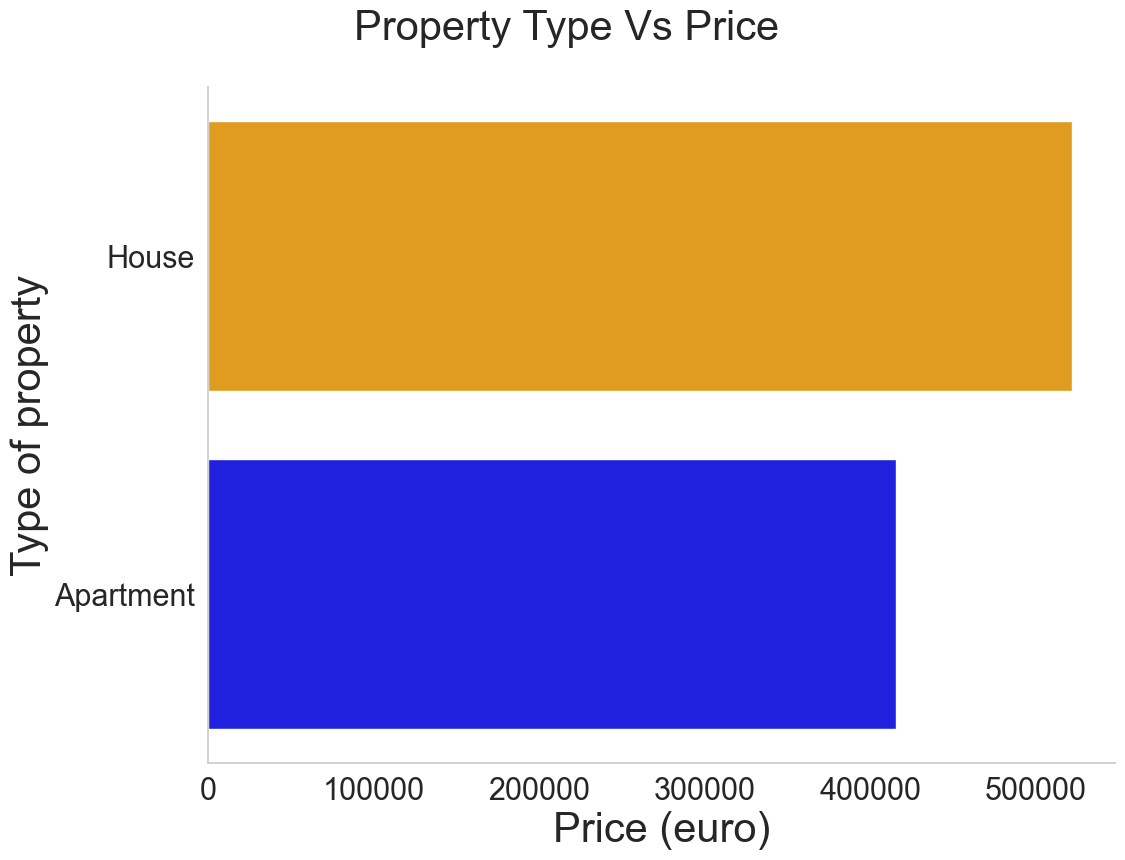

In [ ]:
#Property Type Vs Price
plt.figure(figsize=(12, 6))
sns.set(font_scale=2.0)
sns.set_style("whitegrid", {'axes.grid' : False})
color_palette= {"Apartment" : "blue" , "House" : "orange"}
g = sns.catplot(kind="bar",y="Type of property", x="Price (euro)", data=df ,ci=None,palette = color_palette,height=8.27, aspect=11.7/8.27)
g.fig.suptitle("Property Type Vs Price" , y=1.05,fontsize=30)
plt.xlabel("Price (euro)", fontsize=30)
plt.ylabel("Type of property", fontsize=30)
plt.show()

C:\Users\mahak\AppData\Local\Temp\ipykernel_11328\4282153053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(kind="bar",x="Type of property", y="Price (euro)", data=df ,ci=None,palette = color_palette)
C:\Users\mahak\AppData\Local\Temp\ipykernel_11328\4282153053.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(kind="bar",x="Type of property", y="Price (euro)", data=df ,ci=None,palette = color_palette)
c:\Users\mahak\Web Scraping\my-fancy-projects\.myvirtualenviornment\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


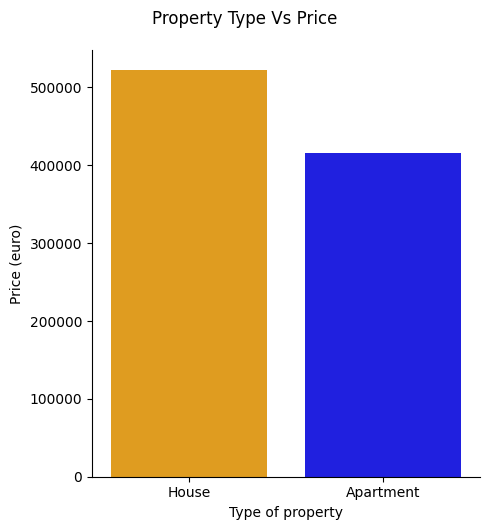

In [ ]:
#Property Type Vs Price
color_palette= {"Apartment" : "blue" , "House" : "orange"}
g = sns.catplot(kind="bar",x="Type of property", y="Price (euro)", data=df ,ci=None,palette = color_palette)
g.fig.suptitle("Property Type Vs Price" , y=1.05)
#plt.xticks(rotation=90)
plt.show()

In [ ]:
#Average of Price in each Region
color_palette= {"Apartment" : "blue" , "House" : "orange"}
agg_price = df.groupby(['region'])['Price (euro)'].mean().reset_index().sort_values('Price (euro)', ascending=False)
g = sns.catplot(kind="bar",x='region', y='Price (euro)', data=df,order=agg_price['region'],ci=None , hue="Type of property", palette = color_palette)
g.set(xlabel='Region', ylabel='Price (euro)')
g.fig.suptitle("Average of Price in each Region",fontsize=20,y=1.10)
plt.show()

C:\Users\mahak\AppData\Local\Temp\ipykernel_11328\2015424550.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(kind="bar",x='region', y='Price (euro)', data=df,order=agg_price['region'],ci=None , hue="Type of property", palette = color_palette)
c:\Users\mahak\Web Scraping\my-fancy-projects\.myvirtualenviornment\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


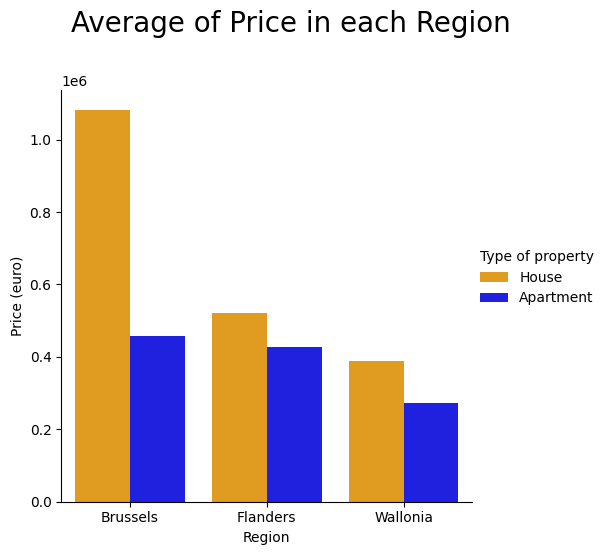

In [ ]:
#Average of Price in each Region
color_palette= {"Apartment" : "blue" , "House" : "orange"}
agg_price = df.groupby(['region'])['Price (euro)'].mean().reset_index().sort_values('Price (euro)', ascending=False)
g = sns.catplot(kind="bar",x='region', y='Price (euro)', data=df,order=agg_price['region'],ci=None , hue="Type of property", palette = color_palette)
g.set(xlabel='Region', ylabel='Price (euro)')
g.fig.suptitle("Average of Price in each Region",fontsize=20,y=1.10)
plt.show()

474856.0948213277 340000.0


(0.0, 500.0)

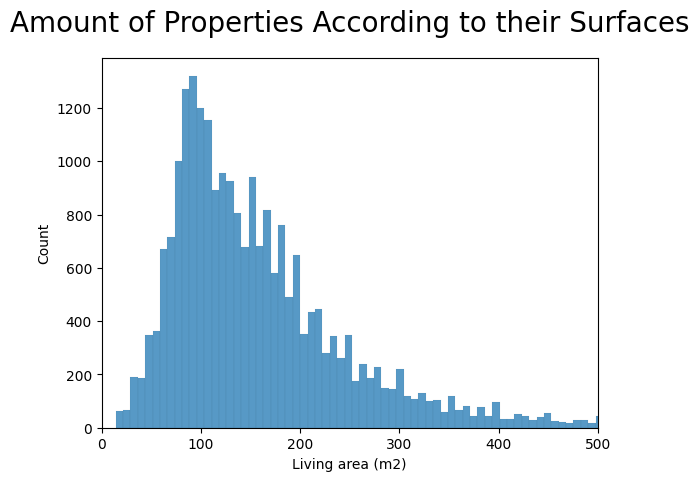

In [ ]:
#The number of properties distributed according to their surface
mean = df['Price (euro)'].mean()
median = df['Price (euro)'].median()
print (mean, median)
g = sns.histplot(data=df, x= 'Living surface (sqm)')
g.set(xlabel='Living area (m2)', ylabel='Count')
g.set_title("Amount of Properties According to their Surfaces",fontsize=20,y=1.05)
g.set_xlim(0,500)
#plt.axvline(median, color='green', linestyle='--', label='Median')
#plt.axvline(mean, color='red', linestyle='--', label='Mean')

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Belgium map data
belgium_map = gpd.read_file('path_to_belgium_shapefile.shp')

# Sample data with postal codes and prices
data = {
    'PostalCode': ['1000', '1050', '2000', '3000', '4000'],
    'Price': [200000, 250000, 300000, 180000, 220000]
}

# Merge map data with your data
merged_data = belgium_map.merge(pd.DataFrame(data), left_on='postal_code', right_on='PostalCode', how='left')

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='centroid_x', y='centroid_y', hue='Price', palette='coolwarm', size='Price', sizes=(50, 500))
plt.title('Price Heatmap by Postal Code in Belgium')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()